# **Credit Risk Prediction Model**

ID/X Partners Internship Project - DATA SCIENTIST

Nama : Indri Windriasari




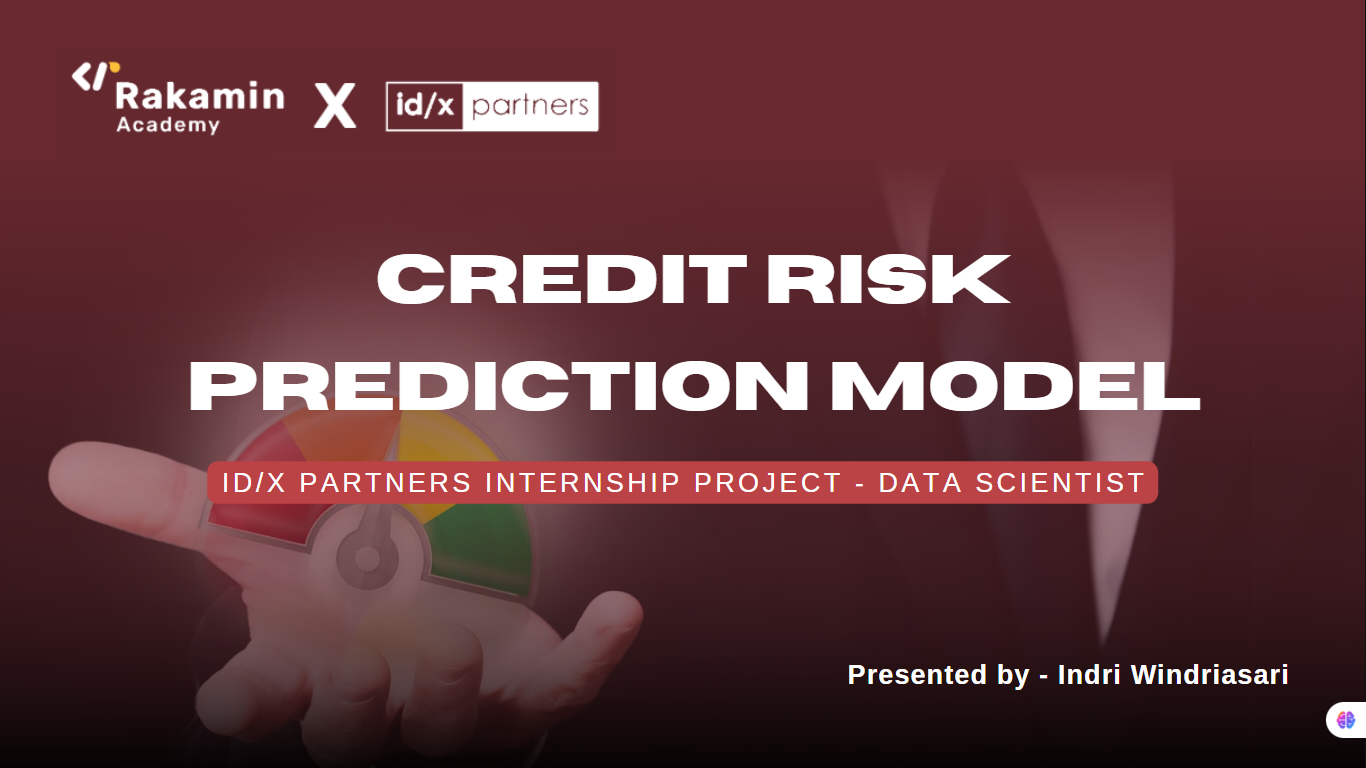

**Kredit Konsumer & Risiko Kredit di Industri Keuangan**

Proyek ini berada dalam domain risk analytics untuk pinjaman individual/konsumer pada sektor keuangan (multifinance). Fokus utama proyek ini adalah untuk memprediksi risiko gagal bayar (default) berdasarkan data historis riwayat kredit nasabah.

# **Business Understanding**

Perusahaan jasa keuangan (multifinance) perlu meminimalkan risiko kerugian akibat gagal bayar dari nasabah. Oleh karena itu, penting untuk mengembangkan sistem penilaian risiko yang mampu mendeteksi sejak awal apakah calon debitur memiliki potensi default atau tidak.

Sebagai Data Scientist Intern di ID/X Partners, saya bertugas untuk:

- Mengolah dan menganalisis data kredit historis.

- Mengembangkan model prediktif yang mampu membedakan nasabah yang cenderung membayar dengan lancar vs. nasabah yang berpotensi gagal bayar.

- Memberikan insight bisnis dari hasil analisis data.

**Bagaimana cara memanfaatkan data historis kredit untuk memprediksi apakah seorang nasabah akan mengalami gagal bayar, guna mendukung pengambilan keputusan kredit yang lebih akurat dan efisien?**

🎯 **Business Goals**:
- Meningkatkan efektivitas sistem penilaian kredit.

- Menurunkan tingkat Non-Performing Loan (NPL).

- Memberikan rekomendasi data-driven dalam proses approval pinjaman.

🎯 **Data Science Goals**:
- Membangun model klasifikasi yang dapat memprediksi apakah peminjam akan gagal bayar atau tidak.

- Mengidentifikasi fitur-fitur utama yang paling berkontribusi terhadap risiko gagal bayar.

- Menyediakan interpretasi model yang mudah dipahami oleh tim bisnis atau manajemen risiko.

# **Data Loading**


In [10]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv('/content/drive/MyDrive/PBI - Data Scientist/loan_data_2007_2014.csv')
df.head(3)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment grade sub_grade emp_title emp_length home_ownership  annual_inc verification_status issue_d  loan_status pymnt_plan                                                url                                               desc         purpose                 title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  annual_inc_joint  dti_joint  verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  open_il_12m  \
0           0  1077501    1296599       5000         5000           4975.0   36 months     10.65       162.87     B        B2       NaN  10+ years           RENT     24000.0            Verified  Dec-11   Fully Paid          n  https://www.lendingclub.com/browse/loanDetail....    Borrower added on 12/22/11 > I need to upgra...     credit_card              Computer    860xx         AZ  27.65          0.0           Jan-85             1.0                     NaN                     NaN       3.0      0.0      13648        83.7        9.0                   f        0.0            0.0  5861.071414          5831.78          5000.00         861.07                 0.0        0.00                     0.00       Jan-15           171.62          NaN             Jan-16                         0.0                          NaN            1       INDIVIDUAL               NaN        NaN                        NaN             0.0           NaN          NaN          NaN         NaN          NaN   
1           1  1077430    1314167       2500         2500           2500.0   60 months     15.27        59.83     C        C4     Ryder   < 1 year           RENT     30000.0     Source Verified  Dec-11  Charged Off          n  https://www.lendingclub.com/browse/loanDetail....    Borrower added on 12/22/11 > I plan to use t...             car                  bike    309xx         GA   1.00          0.0           Apr-99             5.0                     NaN                     NaN       3.0      0.0       1687         9.4        4.0                   f        0.0            0.0  1008.710000          1008.71           456.46         435.17                 0.0      117.08                     1.11       Apr-13           119.66          NaN             Sep-13                         0.0                          NaN            1       INDIVIDUAL               NaN        NaN                        NaN             0.0           NaN          NaN          NaN         NaN          NaN   
2           2  1077175    1313524       2400         2400           2400.0   36 months     15.96        84.33     C        C5       NaN  10+ years           RENT     12252.0        Not Verified  Dec-11   Fully Paid          n  https://www.lendingclub.com/browse/loanDetail....                                                NaN  small_business  real estate business    606xx         IL   8.72          0.0           Nov-01             2.0                     NaN                     NaN       2.0      0.0       2956        98.5       10.0                   f        0.0            0.0  3003.653644          3003.65          2400.00         603.65                 0.0        0.00                     0.00       Jun-14           649.91          NaN             Jan-16                         0.0                          NaN            1       INDIVIDUAL               NaN        NaN                        NaN             0.0           NaN          NaN          NaN         NaN          NaN   

   open_il_24m  mths_since

#**Data Understanding**

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## **Ringkasan Dataset**
Dataset yang digunakan dalam proyek ini adalah Loan Dataset (2007-2014) yang berasal dari platform pinjaman online yang berisi data historis peminjaman dana dari tahun 2007 hingga 2014. Dataset  mencakup informasi rinci terkait profil peminjam, rincian pinjaman, kondisi keuangan, dan status pembayaran pinjaman.

- Jumlah baris: 466285

- Jumlah kolom: 75

- Target variabel: `loan_status`. Akan dikonversi menjadi label biner:

  - 0 = Tidak gagal bayar (Fully Paid)

  - 1 = Gagal bayar (Charged Off)

In [47]:
df.shape

(466285, 75)

In [48]:
df.describe()

Unnamed: 0            id     member_id      loan_amnt    funded_amnt  funded_amnt_inv       int_rate    installment    annual_inc            dti    delinq_2yrs  inq_last_6mths  mths_since_last_delinq  mths_since_last_record       open_acc        pub_rec     revol_bal     revol_util      total_acc      out_prncp  out_prncp_inv    total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee     recoveries  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  annual_inc_joint  dti_joint  verification_status_joint  acc_now_delinq  tot_coll_amt   tot_cur_bal  open_acc_6m  open_il_6m  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  total_cu_tl  inq_last_12m
count  466285.000000  4.662850e+05  4.662850e+05  466285.000000  466285.000000    466285.000000  466285.000000  466285.000000  4.662810e+05  466285.000000  466256.000000   466256.000000           215934.000000            62638.000000  466256.000000  466256.000000  4.662850e+05  465945.000000  466256.000000  466285.000000  466285.000000  466285.000000    466285.000000    466285.000000  466285.000000       466285.000000  466285.000000            466285.000000    466285.000000               466140.000000                 98974.000000     466285.0               0.0        0.0                        0.0   466256.000000  3.960090e+05  3.960090e+05          0.0         0.0          0.0          0.0                 0.0           0.0      0.0          0.0          0.0         0.0       0.0      3.960090e+05     0.0          0.0           0.0
mean   233142.000000  1.307973e+07  1.459766e+07   14317.277577   14291.801044     14222.329888      13.829236     432.061201  7.327738e+04      17.218758       0.284678        0.804745               34.104430               74.306012      11.187069       0.160564  1.623020e+04      56.176947      25.064430    4410.062342    4408.452258   11540.686220     11469.892747      8866.014657    2588.677225            0.650129      85.344211                 8.961534      3123.913796                    0.009085                    42.852547          1.0               NaN        NaN                        NaN        0.004002  1.919135e+02  1.388017e+05          NaN         NaN          NaN          NaN                 NaN           NaN      NaN          NaN          NaN         NaN       NaN      3.037909e+04     NaN          NaN           NaN
std    134605.029472  1.089371e+07  1.168237e+07    8286.509164    8274.371300      8297.637788       4.357587     243.485550  5.496357e+04       7.851121       0.797365        1.091598               21.778487               30.357653       4.987526       0.510863  2.067625e+04      23.732628      11.600141    6355.078769    6353.198001    8265.627112      8254.157579      7031.687997    2483.809661            5.265730     552.216084                85.491437      5554.737393                    0.108648                    21.662591          0.0               NaN        NaN                        NaN        0.068637  1.463021e+04  1.521147e+05          NaN         NaN          NaN          NaN                 NaN           NaN      NaN          NaN          NaN         NaN       NaN      3.724713e+04     NaN          NaN           NaN
min         0.000000  5.473400e+04  7.047300e+04     500.000000     500.000000         0.000000       5.420000      15.670000  1.896000e+03       0.000000       0.000000        0.000000                0.000000                0.000000       0.000000       0.000000  0.000000e+00       0.000000       1.000000       0.000000       0.000000       0.000000         0.000000         0.000000       0.000000            0.000000       0.000000                 0.000000         0.000000                    0.000000                     0.000000          1.0               NaN        NaN                        NaN        0.000000  0.000000e+00

Beberapa fitur penting dalam dataset ini meliputi:

`loan_amnt`: Jumlah dana pinjaman yang diajukan.

`term`: Jangka waktu pinjaman (misalnya 36 atau 60 bulan).

`int_rate`: Tingkat bunga pinjaman.

`installment`: Jumlah cicilan bulanan

`grade` dan `sub_grade`: Kategori risiko kredit yang diberikan.

`emp_length`: Lama bekerja peminjam dalam tahun.

`home_ownership`: Status kepemilikan rumah (RENT, OWN, MORTGAGE).

`annual_inc`: Pendapatan tahunan peminjam.

`purpose`: Tujuan pinjaman (debt_consolidation, small_business, dll.)

`dti`: Debt-to-Income ratio

`delinq_2yrs`: Jumlah keterlambatan pembayaran > 30 hari dalam 2 tahun terakhir

`revol_util`: Persentase pemakaian kredit revolving

`earliest_cr_line` dan `issue_d`: Tanggal awal kredit dan tanggal pinjaman diterbitkan (dipakai untuk menghitung umur kredit).

`total_acc`: Jumlah total akun kredit yang dimiliki

`loan_status`: Status pinjaman yang menjadi target variabel, di mana pinjaman dapat berstatus lancar, terlambat, atau gagal bayar.


In [49]:
def explore(df):
  """
    Fungsi ini digunakan untuk melakukan eksplorasi awal pada dataset yang diberikan dan memberikan informasi penting tentang setiap kolom dalam DataFrame, seperti:
      - Tipe data setiap kolom.
      - Persentase nilai yang hilang di setiap kolom.
      - Jumlah nilai unik yang ada di setiap kolom.
      - Daftar nilai unik dari setiap kolom.
  """
  with pd.option_context("display.max_colwidth", 20):
    info = pd.DataFrame()
    info['data type'] = df.dtypes
    info['percentage missing'] = df.isnull().sum()*100/len(df)
    info['number of unique'] = df.apply(lambda x: len(x.unique()))
    info['unique values'] = df.apply(lambda x: x.unique())
  return info.sort_values('data type')

In [50]:
explore(df)

data type  percentage missing  number of unique                                      unique values
Unnamed: 0                      int64            0.000000            466285  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
id                              int64            0.000000            466285  [1077501, 1077430, 1077175, 1076863, 1075358, ...
member_id                       int64            0.000000            466285  [1296599, 1314167, 1313524, 1277178, 1311748, ...
loan_amnt                       int64            0.000000              1352  [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...
funded_amnt                     int64            0.000000              1354  [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...
revol_bal                       int64            0.000000             58142  [13648, 1687, 2956, 5598, 27783, 7963, 17726, ...
policy_code                     int64            0.000000                 1                                                [1]
dti_joint                     float64          100.000000                 1                                              [nan]
annual_inc_joint              float64          100.000000                 1                                              [nan]
mths_since_last_major_derog   float64           78.773926               163  [nan, 53.0, 34.0, 54.0, 69.0, 7.0, 16.0, 71.0,...
collections_12_mths_ex_med    float64            0.031097                10  [0.0, nan, 1.0, 2.0, 4.0, 3.0, 6.0, 16.0, 20.0...
last_pymnt_amnt               float64            0.000000            198194  [171.62, 119.66, 649.91, 357.48, 67.79, 161.03...
total_rec_late_fee            float64            0.000000              5808  [0.0, 16.97, 15.0, 24.17, 14.98883533, 1.0, 23...
recoveries                    float64            0.000000             22773  [0.0, 117.08, 189.06, 269.29, 444.3, 645.1, 26...
verification_status_joint     float64          100.000000                 1                                              [nan]
total_rec_int                 float64            0.000000            270249  [861.07, 435.17, 603.65, 2209.33, 1009.07, 631...
total_rec_prncp               float64            0.000000            172713  [5000.0, 456.46, 2400.0, 10000.0, 2233.1, 5110...
total_pymnt_inv               float64            0.000000            347659  [5831.78, 1008.71, 3003.65, 12226.3, 3242.17, ...
collection_recovery_fee       float64            0.000000             20275  [0.0, 1.11, 2.09, 2.52, 4.16, 6.3145, 2.57, 2....
acc_now_delinq                float64            0.006219                 7                [0.0, 1.0, nan, 2.0, 3.0, 5.0, 4.0]
tot_cur_bal                   float64           15.071469            220691  [nan, 114834.0, 14123.0, 267646.0, 13605.0, 27...
total_pymnt                   float64            0.000000            351609  [5861.071414, 1008.71, 3003.653644, 12226.3022...
open_acc_6m                   float64          100.000000                 1                                              [nan]
open_il_6m                    float64          100.000000                 1                                              [nan]
open_il_12m                   float64          100.000000                 1                                              [nan]
open_il_24m                   float64          100.000000                 1                                              [nan]
mths_since_rcnt_il            float64          100.000000                 1                                              [nan]
total_bal_il                  float64          100.000000                 1                                              [nan]
il_util                       float64          100.000000                 1                                              [nan]
open_rv_12m                   float64          100.000000                 1                                              [nan]
open_rv_24m                   float64          100.000000                 1                

# Data Preprocessing

`Unnamed`: 0 → indeks, bisa di-drop.

`id`, `member_id` → ID unik, tidak berguna untuk prediksi, drop.

`url` → berisi tautan, drop.

`desc` → teks tidak terstruktur dan banyak missing (72.98%), drop.

`emp_title` → 5.9% missing dan sangat banyak nilai unik (205k+), bisa drop jika tidak diproses NLP.

In [51]:
# Daftar kolom yang ingin dihapus
useless_cols = ['Unnamed: 0', 'id', 'member_id', 'url', 'desc', 'emp_title']

# Drop kolom dari DataFrame jika ada
df = df.drop(columns=[col for col in useless_cols if col in df.columns])


Kolom dengan hanya 1 Nilai Unik dihapus karena tidak menambah nilai informasi, tidak membantu model mempelajari pola, dan menambah kompleksitas dan dimensi data secara tidak perlu.

`policy_code` →	1 nilai unik yaitu [1]

`application_type`	→ nilai unik yaitu [INDIVIDUAL]

In [57]:
df.drop(columns=['policy_code', 'application_type'], inplace=True)

## Missing Value

Missing value = 100%

In [52]:
full_non_null = [col for col in df_cred.columns if df_cred[col].isnull().all()]
print(full_non_null)

['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


In [53]:
print(len(full_non_null),'column(s)')

17 column(s)


Terdapat 17 kolom dengan missing value sebanyak 100%. Maka perlu dihilangkan/dihapus

In [54]:
df = df.drop(axis=1, columns=full_non_null) # handling missing value (menghapus)

In [58]:
df.shape

(466285, 50)

In [59]:
explore(df)

data type  percentage missing  number of unique                                      unique values
loan_amnt                       int64            0.000000              1352  [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...
funded_amnt                     int64            0.000000              1354  [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...
revol_bal                       int64            0.000000             58142  [13648, 1687, 2956, 5598, 27783, 7963, 17726, ...
open_acc                      float64            0.006219                63  [3.0, 2.0, 10.0, 15.0, 9.0, 7.0, 4.0, 11.0, 14...
pub_rec                       float64            0.006219                27  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan, 6.0, 9.0, ...
revol_util                    float64            0.072917              1270  [83.7, 9.4, 98.5, 21.0, 53.9, 28.3, 85.6, 87.5...
total_acc                     float64            0.006219               113  [9.0, 4.0, 10.0, 37.0, 38.0, 12.0, 11.0, 13.0,...
out_prncp                     float64            0.000000            135665  [0.0, 766.9, 1889.15, 2695.31, 3193.13, 2462.2...
out_prncp_inv                 float64            0.000000            141189  [0.0, 766.9, 1889.15, 2688.53, 3186.72, 2455.3...
total_pymnt                   float64            0.000000            351609  [5861.071414, 1008.71, 3003.653644, 12226.3022...
total_pymnt_inv               float64            0.000000            347659  [5831.78, 1008.71, 3003.65, 12226.3, 3242.17, ...
total_rec_prncp               float64            0.000000            172713  [5000.0, 456.46, 2400.0, 10000.0, 2233.1, 5110...
total_rec_int                 float64            0.000000            270249  [861.07, 435.17, 603.65, 2209.33, 1009.07, 631...
total_rec_late_fee            float64            0.000000              5808  [0.0, 16.97, 15.0, 24.17, 14.98883533, 1.0, 23...
recoveries                    float64            0.000000             22773  [0.0, 117.08, 189.06, 269.29, 444.3, 645.1, 26...
collection_recovery_fee       float64            0.000000             20275  [0.0, 1.11, 2.09, 2.52, 4.16, 6.3145, 2.57, 2....
last_pymnt_amnt               float64            0.000000            198194  [171.62, 119.66, 649.91, 357.48, 67.79, 161.03...
collections_12_mths_ex_med    float64            0.031097                10  [0.0, nan, 1.0, 2.0, 4.0, 3.0, 6.0, 16.0, 20.0...
mths_since_last_major_derog   float64           78.773926               163  [nan, 53.0, 34.0, 54.0, 69.0, 7.0, 16.0, 71.0,...
acc_now_delinq                float64            0.006219                 7                [0.0, 1.0, nan, 2.0, 3.0, 5.0, 4.0]
tot_coll_amt                  float64           15.071469              6322  [nan, 0.0, 15386.0, 1514.0, 154.0, 539.0, 92.0...
tot_cur_bal                   float64           15.071469            220691  [nan, 114834.0, 14123.0, 267646.0, 13605.0, 27...
mths_since_last_delinq        float64           53.690554               146  [nan, 35.0, 38.0, 61.0, 8.0, 20.0, 18.0, 68.0,...
mths_since_last_record        float64           86.566585               124  [nan, 113.0, 105.0, 97.0, 33.0, 93.0, 52.0, 85...
annual_inc                    float64            0.000858             31902  [24000.0, 30000.0, 12252.0, 49200.0, 80000.0, ...
funded_amnt_inv               float64            0.000000              9854  [4975.0, 2500.0, 2400.0, 10000.0, 3000.0, 5000...
int_rate                      float64            0.000000               506  [10.65, 15.27, 15.96, 13.49, 12.69, 7.9, 18.64...
installment                   float64            0.000000             55622  [162.87, 59.83, 84.33, 339.31, 67.79, 156.46, ...
inq_last_6mths                float64            0.006219                29  [1.0, 5.0, 2.0, 0.0, 3.0, 4.0, 6.0, 7.0, 8.0, ...
total_rev_hi_lim              float64           15.071469             14613  [nan, 59900.0, 15100.0, 61100.0, 8100.0, 15400...
delinq_2yrs                   float64            0.006219                25  [0.0, 2.0, 3.0

Mengetahui persentase missing value dari yang terbesar

In [62]:
percent_missing = df.isnull().sum() * 100 / len(df)
dtypes=[df[col].dtype for col in df.columns]
missing_value_df = pd.DataFrame({'data_type':dtypes,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)

In [63]:
missing_value_df.head(12)

data_type  percent_missing
mths_since_last_record        float64        86.566585
mths_since_last_major_derog   float64        78.773926
mths_since_last_delinq        float64        53.690554
next_pymnt_d                   object        48.728567
tot_coll_amt                  float64        15.071469
tot_cur_bal                   float64        15.071469
total_rev_hi_lim              float64        15.071469
emp_length                     object         4.505399
last_pymnt_d                   object         0.080637
revol_util                    float64         0.072917
collections_12_mths_ex_med    float64         0.031097
last_credit_pull_d             object         0.009007

- Missing values > 50%:

  `mths_since_last_record` = Jumlah bulan sejak catatan publik terakhir

  `mths_since_last_major_derog` = Jumlah bulan sejak peringkat 90 hari terakhir atau peringkat yang lebih buruk

  `mths_since_last_delinq` = Jumlah bulan sejak tunggakan terakhir peminjam


- Missing values 35% - 50%:

  `next_payment_d` = Pembayaran bulan terakhir yang diterima


- Missing values 1% - 20%

  `tot_cur_bal` = Total saldo saat ini dari semua akun

  `total_rev_hi_lim` = Total kredit bergulir yang tinggi/pagu kredit

  `tot_coll_amt` = Total jumlah penagihan yang pernah terutang

  `emp_length` = Lama bekerja dalam tahun. Nilai yang dapat diberikan adalah antara 0 dan 10 dimana 0 berarti kurang dari satu tahun dan 10 berarti sepuluh tahun atau lebih.

In [64]:
import pandas as pd
import numpy as np

# Misal df adalah DataFrame utama
def preprocess_loan_data(df):
    # 1. Drop columns with > 50% missing values
    df = df.drop(columns=[
        'mths_since_last_record',
        'mths_since_last_major_derog'
    ], errors='ignore')

    # 2. Drop 'next_payment_d' (35-50% missing)
    df = df.drop(columns=['next_pymnt_d'], errors='ignore')

    # 3. Handle mths_since_last_delinq (50% missing) → fill + add flag
    if 'mths_since_last_delinq' in df.columns:
        df['has_delinquency'] = df['mths_since_last_delinq'].notna().astype(int)
        df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(100)

    # 4. Fill 'tot_cur_bal', 'total_rev_hi_lim' with median or 0
    for col in ['tot_cur_bal', 'total_rev_hi_lim']:
        if col in df.columns:
            df[col] = df[col].median()

    # 5. Fill 'tot_coll_amt' with 0
    if 'tot_coll_amt' in df.columns:
        df['tot_coll_amt'] = df['tot_coll_amt'].fillna(0)

    # 6. Handle emp_length
    if 'emp_length' in df.columns:
        # Clean and convert to numeric
        df['emp_length'] = df['emp_length'].astype(str).str.extract(r'(\d+)').astype(float)
        df['emp_length'] = df['emp_length'].fillna(-1)  # -1 for 'Unknown'

    return df


In [65]:
df = preprocess_loan_data(df)

In [68]:
df.shape

(466285, 49)

In [70]:
df = df.drop(columns=['next_pymnt_d'], errors='ignore')

In [71]:
explore(df)

data type  percentage missing  number of unique                                      unique values
loan_amnt                      int64            0.000000              1352  [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...
revol_bal                      int64            0.000000             58142  [13648, 1687, 2956, 5598, 27783, 7963, 17726, ...
has_delinquency                int64            0.000000                 2                                             [0, 1]
funded_amnt                    int64            0.000000              1354  [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...
pub_rec                      float64            0.006219                27  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan, 6.0, 9.0, ...
revol_util                   float64            0.072917              1270  [83.7, 9.4, 98.5, 21.0, 53.9, 28.3, 85.6, 87.5...
total_acc                    float64            0.006219               113  [9.0, 4.0, 10.0, 37.0, 38.0, 12.0, 11.0, 13.0,...
out_prncp                    float64            0.000000            135665  [0.0, 766.9, 1889.15, 2695.31, 3193.13, 2462.2...
out_prncp_inv                float64            0.000000            141189  [0.0, 766.9, 1889.15, 2688.53, 3186.72, 2455.3...
total_pymnt                  float64            0.000000            351609  [5861.071414, 1008.71, 3003.653644, 12226.3022...
total_pymnt_inv              float64            0.000000            347659  [5831.78, 1008.71, 3003.65, 12226.3, 3242.17, ...
total_rec_prncp              float64            0.000000            172713  [5000.0, 456.46, 2400.0, 10000.0, 2233.1, 5110...
total_rec_int                float64            0.000000            270249  [861.07, 435.17, 603.65, 2209.33, 1009.07, 631...
total_rec_late_fee           float64            0.000000              5808  [0.0, 16.97, 15.0, 24.17, 14.98883533, 1.0, 23...
recoveries                   float64            0.000000             22773  [0.0, 117.08, 189.06, 269.29, 444.3, 645.1, 26...
collection_recovery_fee      float64            0.000000             20275  [0.0, 1.11, 2.09, 2.52, 4.16, 6.3145, 2.57, 2....
last_pymnt_amnt              float64            0.000000            198194  [171.62, 119.66, 649.91, 357.48, 67.79, 161.03...
collections_12_mths_ex_med   float64            0.031097                10  [0.0, nan, 1.0, 2.0, 4.0, 3.0, 6.0, 16.0, 20.0...
acc_now_delinq               float64            0.006219                 7                [0.0, 1.0, nan, 2.0, 3.0, 5.0, 4.0]
tot_coll_amt                 float64            0.000000              6321  [0.0, 15386.0, 1514.0, 154.0, 539.0, 92.0, 152...
tot_cur_bal                  float64            0.000000                 1                                          [81539.0]
funded_amnt_inv              float64            0.000000              9854  [4975.0, 2500.0, 2400.0, 10000.0, 3000.0, 5000...
open_acc                     float64            0.006219                63  [3.0, 2.0, 10.0, 15.0, 9.0, 7.0, 4.0, 11.0, 14...
mths_since_last_delinq       float64            0.000000               145  [100.0, 35.0, 38.0, 61.0, 8.0, 20.0, 18.0, 68....
inq_last_6mths               float64            0.006219                29  [1.0, 5.0, 2.0, 0.0, 3.0, 4.0, 6.0, 7.0, 8.0, ...
int_rate                     float64            0.000000               506  [10.65, 15.27, 15.96, 13.49, 12.69, 7.9, 18.64...
delinq_2yrs                  float64            0.006219                25  [0.0, 2.0, 3.0, 1.0, 4.0, 6.0, 5.0, 8.0, 7.0, ...
dti                          float64            0.000000              3997  [27.65, 1.0, 8.72, 20.0, 17.94, 11.2, 23.51, 5...
installment                  float64            0.000000             55622  [162.87, 59.83, 84.33, 339.31, 67.79, 156.46, ...
emp_length                   float64            0.000000                11  [10.0, 1.0, 3.0, 8.0, 9.0, 4.0, 5.0, 6.0, 2.0,...
total_rev_hi_lim             float64            0.000000                 1                                          [2280

In [72]:
# Imputasi missing <1%
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

Drop Unused Columns

Ada beberapa kolom yang berisiko tinggi menimbulkan kebocoran data (data leakage) atau tidak informatif

In [81]:
drop_columns = [
    'title',                    # mirip dengan 'purpose'
    'zip_code',                 # granular dan tidak informatif
    'last_pymnt_d',             # terjadi setelah pinjaman diberikan
    'last_credit_pull_d',       # terjadi setelah pinjaman diberikan
    'earliest_cr_line',         # perlu diproses sebagai tahun
    'issue_d',                  # bisa jadi leakage
    'out_prncp',                # status pembayaran saat ini
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_amnt',          # semua ini terjadi **setelah** pinjaman
]

df = df.drop(columns=drop_columns)

In [86]:
df.shape

(466285, 32)

In [83]:
explore(df)

data type  percentage missing  number of unique                                      unique values
loan_amnt                      int64                 0.0              1352  [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...
revol_bal                      int64                 0.0             58142  [13648, 1687, 2956, 5598, 27783, 7963, 17726, ...
has_delinquency                int64                 0.0                 2                                             [0, 1]
funded_amnt                    int64                 0.0              1354  [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...
open_acc                     float64                 0.0                62  [3.0, 2.0, 10.0, 15.0, 9.0, 7.0, 4.0, 11.0, 14...
mths_since_last_delinq       float64                 0.0               145  [100.0, 35.0, 38.0, 61.0, 8.0, 20.0, 18.0, 68....
inq_last_6mths               float64                 0.0                28  [1.0, 5.0, 2.0, 0.0, 3.0, 4.0, 6.0, 7.0, 8.0, ...
funded_amnt_inv              float64                 0.0              9854  [4975.0, 2500.0, 2400.0, 10000.0, 3000.0, 5000...
dti                          float64                 0.0              3997  [27.65, 1.0, 8.72, 20.0, 17.94, 11.2, 23.51, 5...
total_rev_hi_lim             float64                 0.0                 1                                          [22800.0]
revol_util                   float64                 0.0              1269  [83.7, 9.4, 98.5, 21.0, 53.9, 28.3, 85.6, 87.5...
total_acc                    float64                 0.0               112  [9.0, 4.0, 10.0, 37.0, 38.0, 12.0, 11.0, 13.0,...
delinq_2yrs                  float64                 0.0                24  [0.0, 2.0, 3.0, 1.0, 4.0, 6.0, 5.0, 8.0, 7.0, ...
collections_12_mths_ex_med   float64                 0.0                 9    [0.0, 1.0, 2.0, 4.0, 3.0, 6.0, 16.0, 20.0, 5.0]
annual_inc                   float64                 0.0             31901  [24000.0, 30000.0, 12252.0, 49200.0, 80000.0, ...
acc_now_delinq               float64                 0.0                 6                     [0.0, 1.0, 2.0, 3.0, 5.0, 4.0]
emp_length                   float64                 0.0                11  [10.0, 1.0, 3.0, 8.0, 9.0, 4.0, 5.0, 6.0, 2.0,...
tot_coll_amt                 float64                 0.0              6321  [0.0, 15386.0, 1514.0, 154.0, 539.0, 92.0, 152...
tot_cur_bal                  float64                 0.0                 1                                          [81539.0]
installment                  float64                 0.0             55622  [162.87, 59.83, 84.33, 339.31, 67.79, 156.46, ...
int_rate                     float64                 0.0               506  [10.65, 15.27, 15.96, 13.49, 12.69, 7.9, 18.64...
pub_rec                      float64                 0.0                26  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 9.0, 8.0, ...
initial_list_status           object                 0.0                 2                                             [f, w]
term                          object                 0.0                 2                           [ 36 months,  60 months]
pymnt_plan                    object                 0.0                 2                                             [n, y]
loan_status                   object                 0.0                 9  [Fully Paid, Charged Off, Current, Default, La...
verification_status           object                 0.0                 3          [Verified, Source Verified, Not Verified]
home_ownership                object                 0.0                 6            [RENT, OWN, MORTGAGE, OTHER, NONE, ANY]
sub_grade                     object                 0.0                35  [B2, C4, C5, C1, B5, A4, E1, F2, C3, B1, D1, A...
grade                         object                 0.0                 7                              [B, C, A, E, F, D, G]
purpose                       object                 0.0                14  [credit_card, car, small_business, other, wed

## Duplicated Data

In [74]:
df.duplicated().sum()

np.int64(0)

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [87]:
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

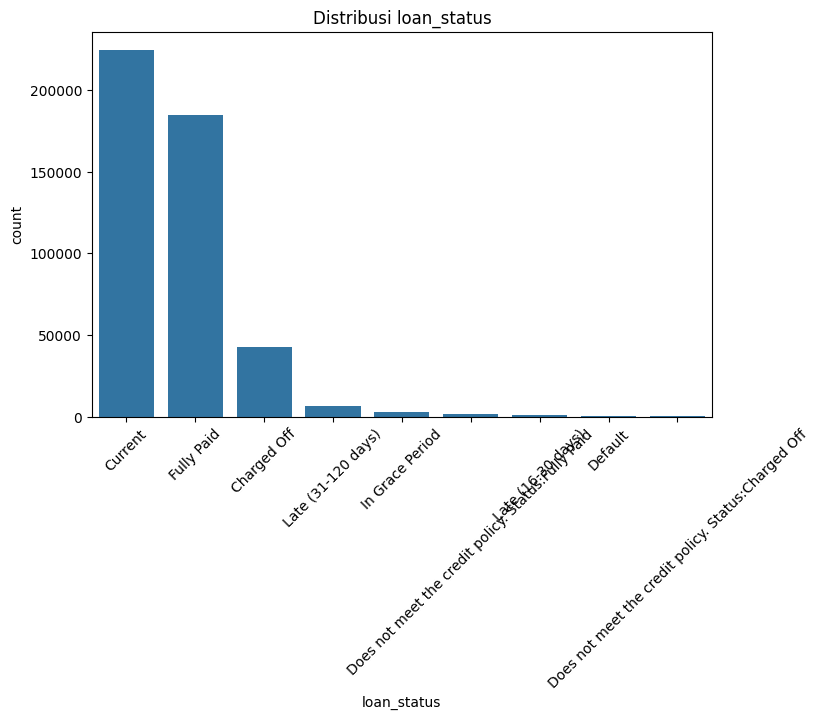

In [89]:
# Visualisasi distribusi target loan_status
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='loan_status', order=df['loan_status'].value_counts().index)
plt.title('Distribusi loan_status')
plt.xticks(rotation=45)
plt.show()

In [90]:
def categorize_loan_status(status):
    good_status = ['Fully Paid',
                   'Does not meet the credit policy. Status:Fully Paid',
                   'Current',
                   'In Grace Period']
    bad_status = ['Charged Off',
                  'Default',
                  'Late (31-120 days)',
                  'Late (16-30 days)',
                  'Does not meet the credit policy. Status:Charged Off']

    if status in good_status:
        return 0  # Good Loan
    elif status in bad_status:
        return 1  # Bad Loan
    else:
        return None  # Kalau ada status lain, bisa set jadi None atau drop nanti

# Terapkan ke dataframe
df['loan_status_bin'] = df['loan_status'].apply(categorize_loan_status)


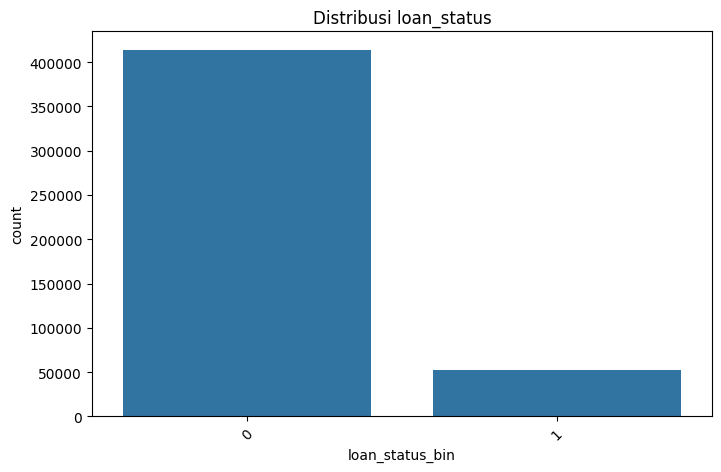

In [93]:
# Visualisasi distribusi target loan_status
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='loan_status_bin', order=df['loan_status_bin'].value_counts().index)
plt.title('Distribusi loan_status')
plt.xticks(rotation=45)
plt.show()

In [95]:
# Cek hasil
print(df['loan_status_bin'].value_counts(dropna=False))

loan_status_bin
0    414099
1     52186
Name: count, dtype: int64


In [94]:
# Check imbalance secara proporsi
print("Proporsi loan_status:")
print(df['loan_status_bin'].value_counts(normalize=True))

Proporsi loan_status:
loan_status_bin
0    0.888081
1    0.111919
Name: proportion, dtype: float64


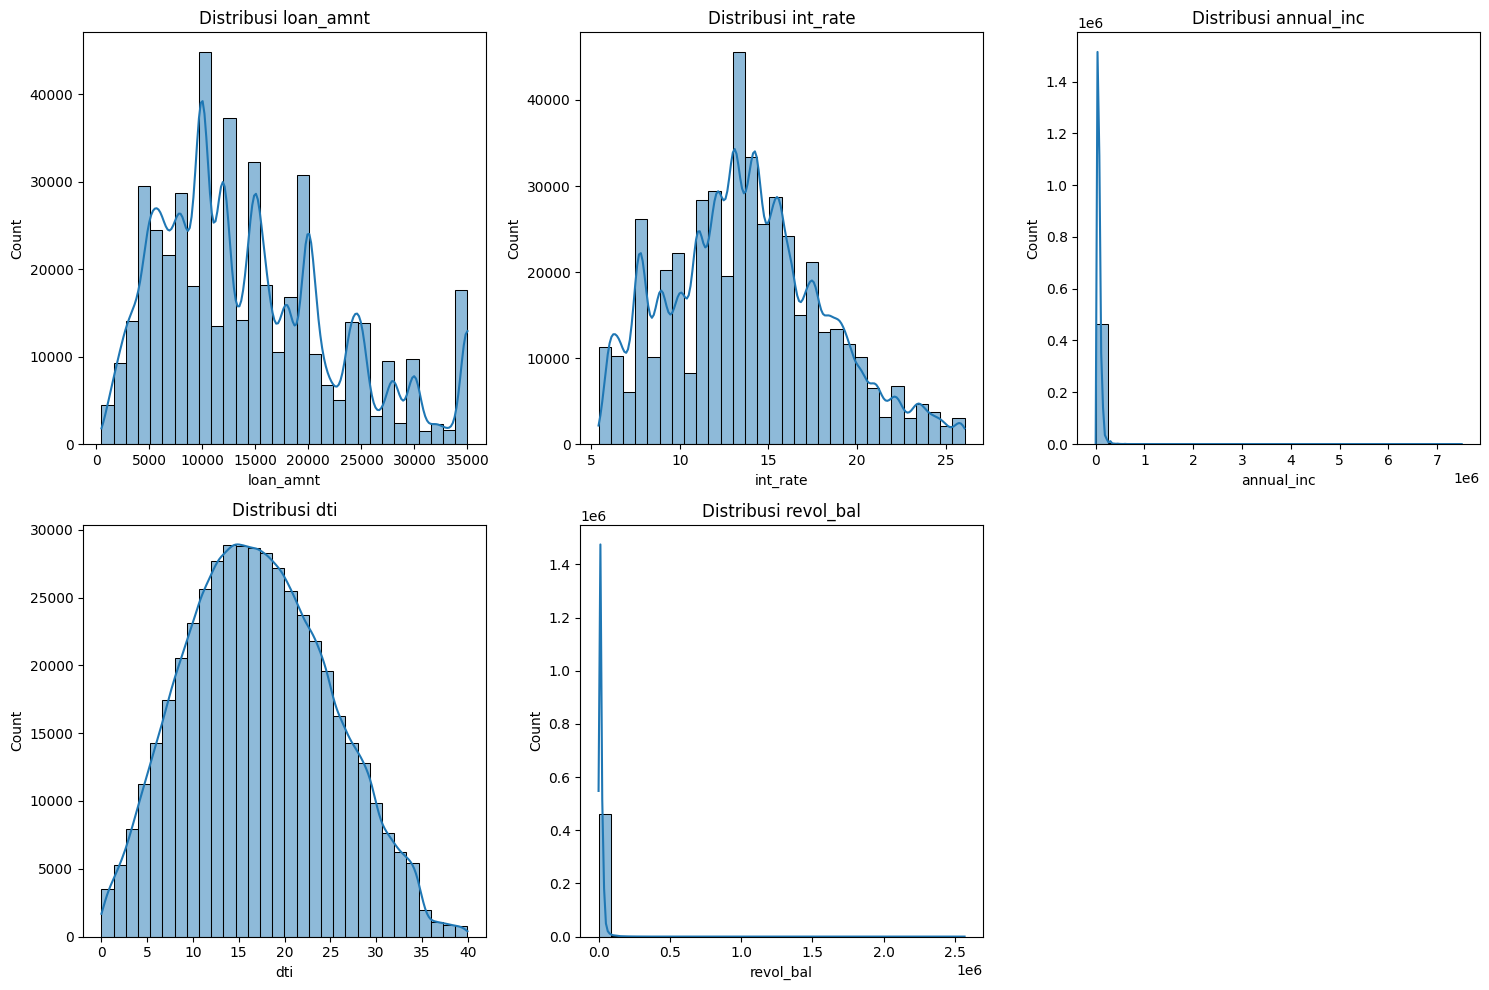

In [96]:
# Distribusi fitur numerik utama
num_features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal']
plt.figure(figsize=(15,10))
for i, col in enumerate(num_features, 1):
    plt.subplot(2,3,i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

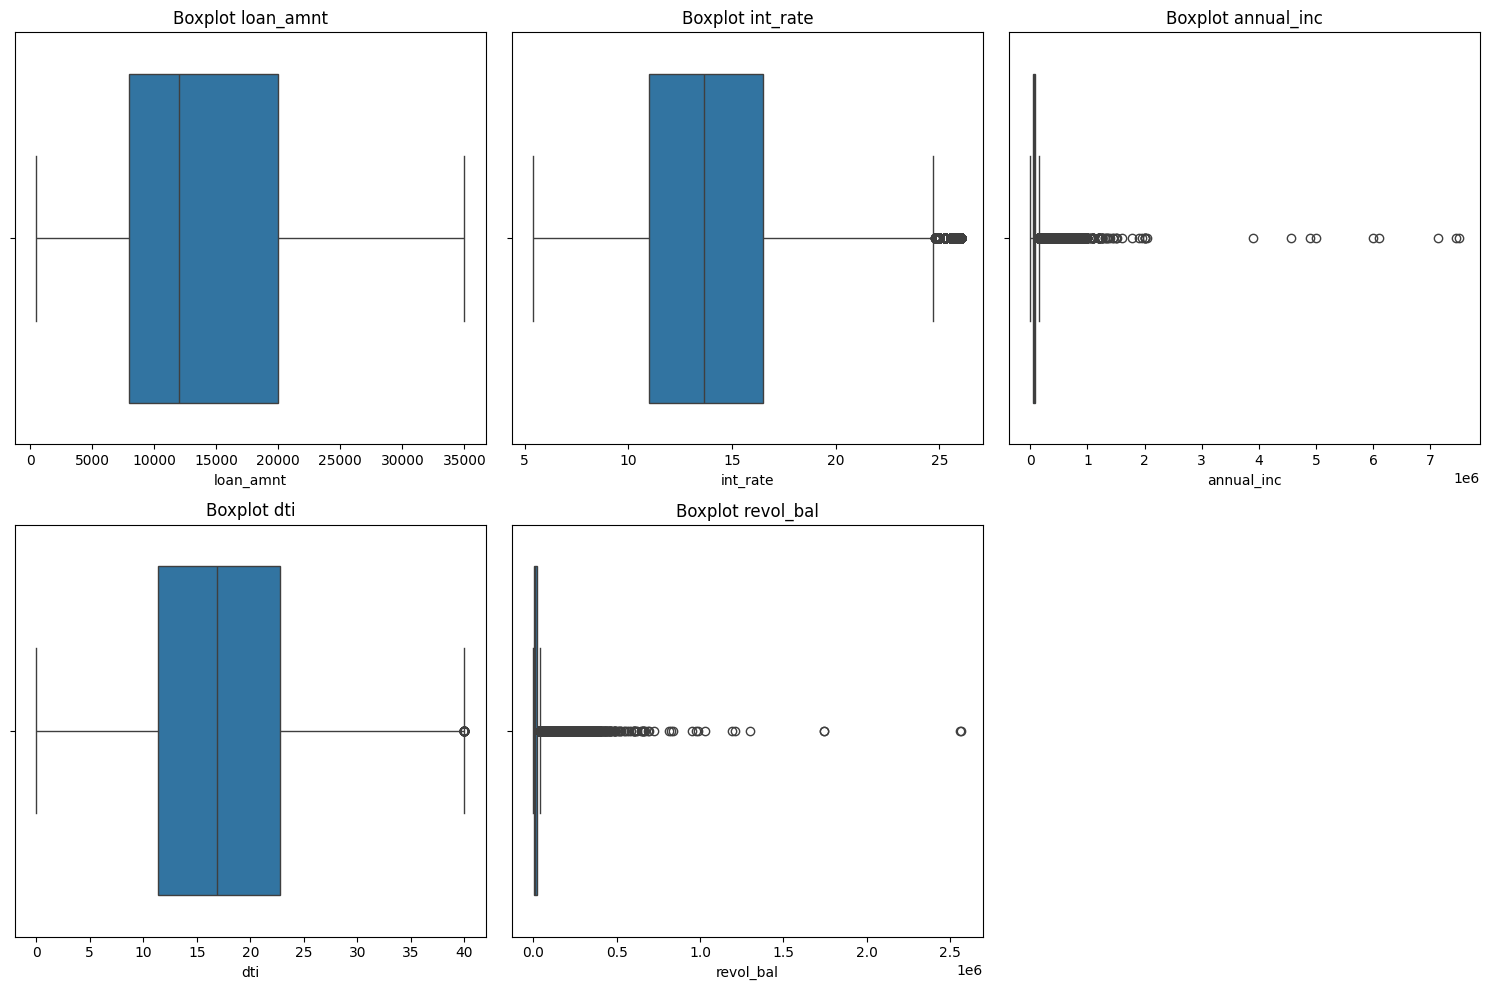

In [97]:
# Boxplot fitur numerik utama untuk lihat outlier dan distribusi
plt.figure(figsize=(15,10))
for i, col in enumerate(num_features, 1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

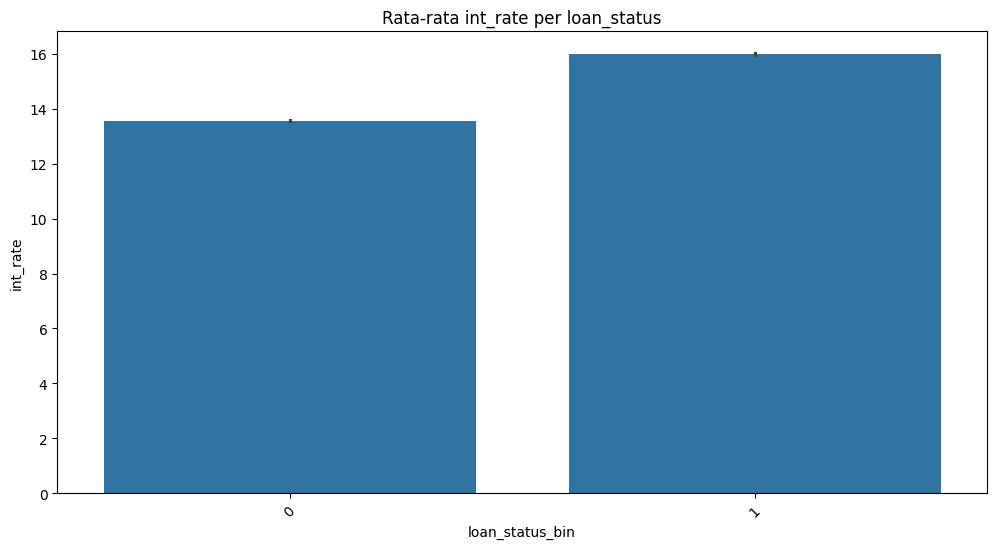

In [100]:
# Hubungan fitur dengan target (mean nilai fitur per kategori loan_status)
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='loan_status_bin', y='int_rate', order=df['loan_status_bin'].value_counts().index)
plt.title('Rata-rata int_rate per loan_status')
plt.xticks(rotation=45)
plt.show()

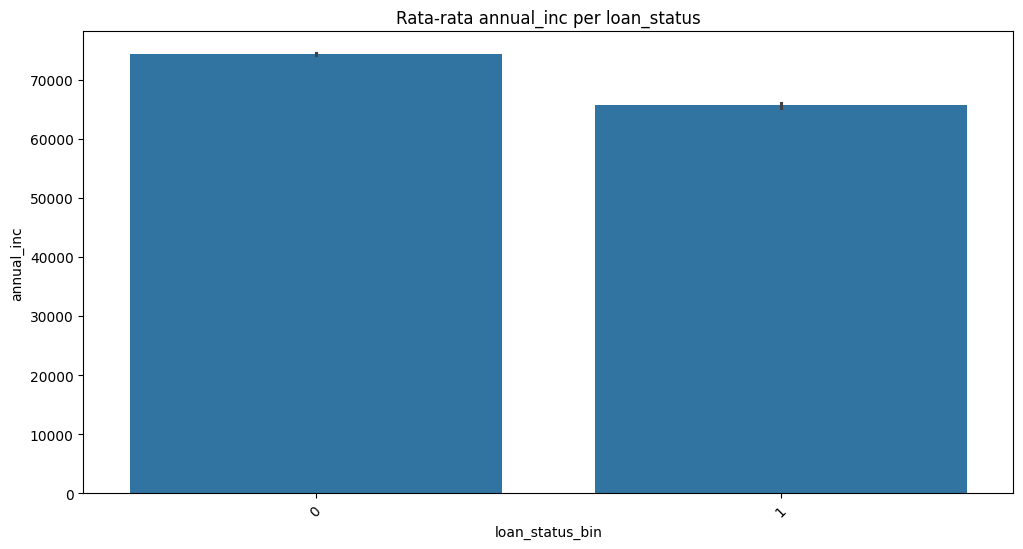

In [101]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='loan_status_bin', y='annual_inc', order=df['loan_status_bin'].value_counts().index)
plt.title('Rata-rata annual_inc per loan_status')
plt.xticks(rotation=45)
plt.show()

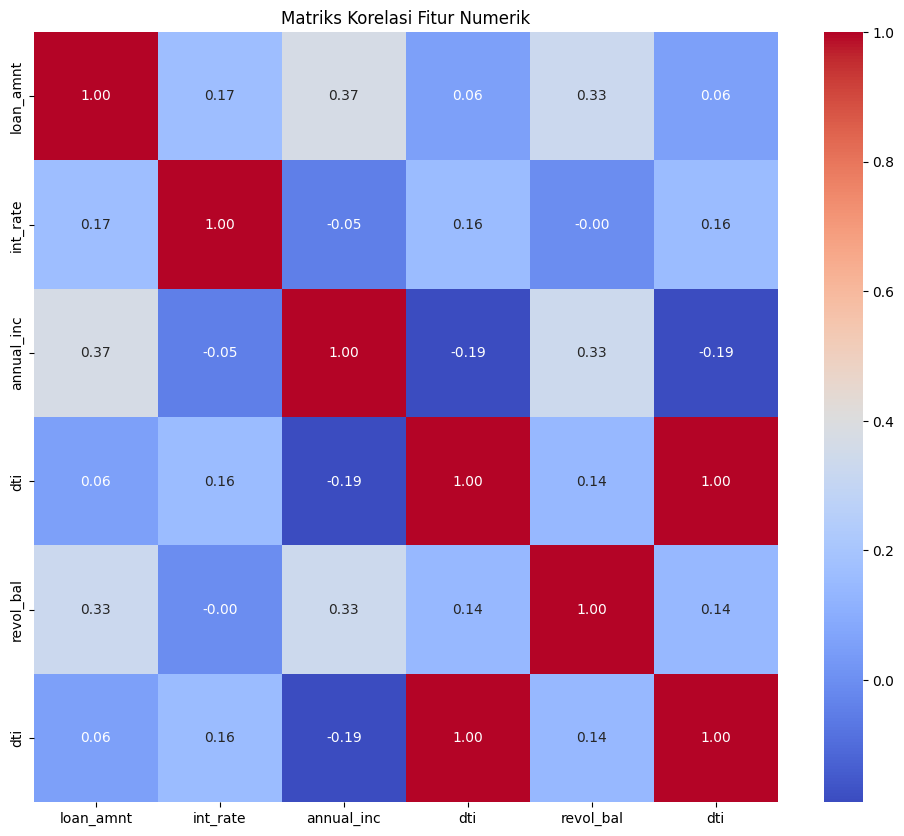

In [102]:
# Korelasi antar fitur numerik
plt.figure(figsize=(12,10))
corr = df[num_features + ['dti']].corr()  # Bisa tambah kolom lain numerik jika perlu
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

### Imputation

In [103]:
# Numerical columns
for col in df.select_dtypes(exclude='object'):
    df[col] = df[col].fillna(df[col].median())
df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
has_delinquency               0
loan_status_bin               0
dtype: int64

In [ ]:
# Non numerical columns
for col in df_cred.select_dtypes(include='object'):
    df_cred[col] = df_cred[col].fillna(df_cred[col].mode().iloc[0])
print("Updated Missing Values")
df_cred.isnull().sum()

Updated Missing Values


Unnamed: 0                     0
id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt_d                   0
last_pymnt_amnt                0
last_credit_pull_d             0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
policy_code                    0
application_type               0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
total_rev_hi_lim               0
dtype: int64

In [ ]:
df_cred.head(3)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment grade sub_grade emp_title emp_length home_ownership  annual_inc verification_status issue_d  loan_status pymnt_plan                                                url         purpose                 title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim
0           0  1077501    1296599       5000         5000           4975.0   36 months     10.65       162.87     B        B2   Teacher  10+ years           RENT     24000.0            Verified  Dec-11   Fully Paid          n  https://www.lendingclub.com/browse/loanDetail....     credit_card              Computer    860xx         AZ  27.65          0.0           Jan-85             1.0                     0.0       3.0      0.0      13648        83.7        9.0                   f        0.0            0.0  5861.071414          5831.78          5000.00         861.07                 0.0        0.00                     0.00       Jan-15           171.62             Jan-16                         0.0                          0.0            1       INDIVIDUAL             0.0           0.0      81539.0           22800.0
1           1  1077430    1314167       2500         2500           2500.0   60 months     15.27        59.83     C        C4     Ryder   < 1 year           RENT     30000.0     Source Verified  Dec-11  Charged Off          n  https://www.lendingclub.com/browse/loanDetail....             car                  bike    309xx         GA   1.00          0.0           Apr-99             5.0                     0.0       3.0      0.0       1687         9.4        4.0                   f        0.0            0.0  1008.710000          1008.71           456.46         435.17                 0.0      117.08                     1.11       Apr-13           119.66             Sep-13                         0.0                          0.0            1       INDIVIDUAL             0.0           0.0      81539.0           22800.0
2           2  1077175    1313524       2400         2400           2400.0   36 months     15.96        84.33     C        C5   Teacher  10+ years           RENT     12252.0        Not Verified  Dec-11   Fully Paid          n  https://www.lendingclub.com/browse/loanDetail....  small_business  real estate business    606xx         IL   8.72          0.0           Nov-01             2.0                     0.0       2.0      0.0       2956        98.5       10.0                   f        0.0            0.0  3003.653644          3003.65          2400.00         603.65                 0.0        0.00                     0.00       Jun-14           649.91             Jan-16                         0.0                          0.0            1       INDIVIDUAL             0.0           0.0      81539.0           22800.0

## Checking Unique Values

In [104]:
print("Unique Features (Numerical)")
print(df.select_dtypes(exclude='object').nunique())

Unique Features (Numerical)
loan_amnt                      1352
funded_amnt                    1354
funded_amnt_inv                9854
int_rate                        506
installment                   55622
emp_length                       11
annual_inc                    31901
dti                            3997
delinq_2yrs                      24
inq_last_6mths                   28
mths_since_last_delinq          145
open_acc                         62
pub_rec                          26
revol_bal                     58142
revol_util                     1269
total_acc                       112
collections_12_mths_ex_med        9
acc_now_delinq                    6
tot_coll_amt                   6321
tot_cur_bal                       1
total_rev_hi_lim                  1
has_delinquency                   2
loan_status_bin                   2
dtype: int64


In [106]:
df["total_rev_hi_lim"].unique()

array([22800.])

* `Unnamed: 0`, `id`, and `member_id` are unique  towards each of rows
* `policy_code` have only single unique value

In [ ]:
print("Unique Features (Categorical)")
print(df_cred.select_dtypes(exclude=['int','float']).nunique())

Unique Features (Categorical)
term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
url                    466285
purpose                    14
title                   63098
zip_code                  888
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
last_credit_pull_d        103
application_type            1
dtype: int64


* `emp_title`, `url`,`title`, `zip_code`, `earliest_cr_line` has more than 500 unique values
* `last_credit_pull_d`,`last_pymnt_d`,`issue_d`,`addr_state` have at least 50 unique values (below 500)
* `application_type` only have single unique value

In [ ]:
df_cred["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

* I need to clean the whitespace

In [ ]:
def word_strip(x):
  return x.strip()

df_cred['term'] = df_cred['term'].apply(lambda x: word_strip(x))
df_cred["term"].unique()

array(['36 months', '60 months'], dtype=object)

In [ ]:
df_cred["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [ ]:
df_cred["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [ ]:
df_cred["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [ ]:
df_cred["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [ ]:
df_cred["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [ ]:
df_cred["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

## Formatting Target Variable

* `loan_status` would be our target variable
* However, I can not implement it directly on 9 unique values
* I will group them into group for binary classification

In [ ]:
df_cred["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

* Good Loan (1) : `Fully Paid`, `Does not meet the credit policy. Status:Fully Paid`
* Bad Loan (0) : `Charged Off`, `Does not meet the credit policy. Status:Charged Off`, `Default`,  `Late (31-120 days)`
* Undetachable Loan (-1) : `Current`, `In Grace Period`, `Late (16-30 days)`
* I will use the Good Loan (1) and the Bad Loan (0) later for binary classification
* Later, Undetachable Loan (-1) columns will be dropped because it is still current loan in progress that can not be detected as good or bad

In [ ]:
# Define a dictionary for encoding target variable
target_dict = {'Fully Paid':1, 'Does not meet the credit policy. Status:Fully Paid':1, # GOOD Loan
               'Charged Off':0,'Does not meet the credit policy. Status:Charged Off':0,'Default':0,'Late (31-120 days)':0, # BAD Loan
               'Current':-1,'In Grace Period':-1,'Late (16-30 days)':-1} #Undetachable Loan
# Create the mapped values in a new column
df_cred['loan_status'] = df_cred['loan_status'].map(target_dict)
# Review dataset
df_cred.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  installment grade sub_grade                 emp_title emp_length home_ownership  annual_inc verification_status issue_d  loan_status pymnt_plan                                                url         purpose                 title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim
0           0  1077501    1296599       5000         5000           4975.0  36 months     10.65       162.87     B        B2                   Teacher  10+ years           RENT     24000.0            Verified  Dec-11            1          n  https://www.lendingclub.com/browse/loanDetail....     credit_card              Computer    860xx         AZ  27.65          0.0           Jan-85             1.0                     0.0       3.0      0.0      13648        83.7        9.0                   f        0.0            0.0   5861.071414          5831.78          5000.00         861.07                0.00        0.00                     0.00       Jan-15           171.62             Jan-16                         0.0                          0.0            1       INDIVIDUAL             0.0           0.0      81539.0           22800.0
1           1  1077430    1314167       2500         2500           2500.0  60 months     15.27        59.83     C        C4                     Ryder   < 1 year           RENT     30000.0     Source Verified  Dec-11            0          n  https://www.lendingclub.com/browse/loanDetail....             car                  bike    309xx         GA   1.00          0.0           Apr-99             5.0                     0.0       3.0      0.0       1687         9.4        4.0                   f        0.0            0.0   1008.710000          1008.71           456.46         435.17                0.00      117.08                     1.11       Apr-13           119.66             Sep-13                         0.0                          0.0            1       INDIVIDUAL             0.0           0.0      81539.0           22800.0
2           2  1077175    1313524       2400         2400           2400.0  36 months     15.96        84.33     C        C5                   Teacher  10+ years           RENT     12252.0        Not Verified  Dec-11            1          n  https://www.lendingclub.com/browse/loanDetail....  small_business  real estate business    606xx         IL   8.72          0.0           Nov-01             2.0                     0.0       2.0      0.0       2956        98.5       10.0                   f        0.0            0.0   3003.653644          3003.65          2400.00         603.65                0.00        0.00                     0.00       Jun-14           649.91             Jan-16                         0.0                          0.0            1       INDIVIDUAL             0.0           0.0      81539.0           22800.0
3           3  1076863    1277178      10000        10000          10000.0  36 months     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years           RENT     49200.0     Source Verified  Dec-11            1          n  https://www.lendingclub.com/browse/loanDetail....           other              personel    917xx         CA  20.00          0.0           Feb-96             1.0                    35.0      10.0      0.0       5598        21.0       37.0                   f        0.0            0.0  12226.302210         12226.30         10000.00        2209.33               16.97        0.00           

In [ ]:
df_cred = df_cred.loc[~df_cred['loan_status'].isin([-1])].reset_index(drop=True)
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   237695 non-null  int64  
 1   id                           237695 non-null  int64  
 2   member_id                    237695 non-null  int64  
 3   loan_amnt                    237695 non-null  int64  
 4   funded_amnt                  237695 non-null  int64  
 5   funded_amnt_inv              237695 non-null  float64
 6   term                         237695 non-null  object 
 7   int_rate                     237695 non-null  float64
 8   installment                  237695 non-null  float64
 9   grade                        237695 non-null  object 
 10  sub_grade                    237695 non-null  object 
 11  emp_title                    237695 non-null  object 
 12  emp_length                   237695 non-null  object 
 13 

In [ ]:
df_cred.tail()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  installment grade sub_grade                              emp_title emp_length home_ownership  annual_inc verification_status issue_d  loan_status pymnt_plan                                                url             purpose                    title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim
237690      466276  9695736   11547808       8525         8525           8525.0  60 months     18.25       217.65     D        D3                                MANAGER    5 years       MORTGAGE     37536.0            Verified  Jan-14            0          n  https://www.lendingclub.com/browse/loanDetail....             medical         Medical expenses    011xx         MA  12.28          4.0           Nov-94             0.0                     3.0      12.0      0.0       5318        10.7       26.0                   f        0.0            0.0   2029.930000          2029.93           360.08         510.45                 0.0      1159.4                   11.594       May-14           217.65             Oct-14                         0.0                          4.0            1       INDIVIDUAL             0.0           0.0     116995.0           49800.0
237691      466277  9007579   10799568      18000        18000          17975.0  36 months      7.90       563.23     A        A4                              sales rep    3 years           RENT     90000.0            Verified  Jan-14            0          n  https://www.lendingclub.com/browse/loanDetail....  debt_consolidation                  my loan    212xx         MD  10.33          1.0           Jul-98             0.0                    14.0      16.0      0.0       8224        16.3       33.0                   f        0.0            0.0   5631.670000          5623.85          4580.89        1050.78                 0.0         0.0                    0.000       Nov-14           563.23             Oct-14                         0.0                         14.0            1       INDIVIDUAL             0.0           0.0      42592.0           50300.0
237692      466278  9745590   11597671      10000        10000          10000.0  36 months     18.25       362.78     D        D3                              MecÃ¡nica  10+ years           RENT     42000.0     Source Verified  Jan-14            1          n  https://www.lendingclub.com/browse/loanDetail....            vacation                 Vacation    201xx         VA  11.57          0.0           Jun-02             0.0                    29.0       9.0      0.0       3196        28.8       24.0                   f        0.0            0.0  12394.165200         12394.17         10000.00        2394.17                 0.0         0.0                    0.000       Sep-15          5501.60             Jan-16                         0.0                         32.0            1       INDIVIDUAL             0.0           0.0      10170.0           11100.0
237693      466281  9684700   11536848      22000        22000          22000.0  60 months     19.97       582.50     D        D5  Chief of Interpretation (Park Ranger)  10+ years       MORTGAGE     78000.0            Verified  Jan-14            0          n  https://www.lendingclub.com/browse/loanDetail....  debt_consolidation       Debt consolidation    377xx         TN  18.45          0.0           Jun-97             5.0                     0.0      18.0      1.0      18238        46.3       30.0                   f        0.0 

## Datetime setting

In [ ]:
# The month the borrower's earliest reported credit line was opened
df_cred['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-00    2056
Oct-99    1883
Nov-00    1847
Oct-01    1840
Nov-99    1807
          ... 
Jun-60       1
Dec-58       1
Aug-64       1
Mar-61       1
Nov-56       1
Name: count, Length: 634, dtype: int64

In [ ]:
df_cred['earliest_cr_line'] = pd.to_datetime(df_cred['earliest_cr_line'], format='%b-%y')

In [ ]:
# The most recent month LC pulled credit for this loan
df_cred['last_credit_pull_d'].value_counts()

last_credit_pull_d
Jan-16    100503
Dec-15     13771
Nov-15      8233
Sep-15      7982
Oct-15      7846
Jul-15      7282
Aug-15      6521
Jun-15      6159
Apr-15      5661
Mar-15      5444
May-15      5309
Feb-15      4790
Jan-15      4753
Dec-14      3681
Oct-14      3346
Nov-14      3158
Sep-14      2957
Aug-14      2807
Jul-14      2768
May-14      2289
Jun-14      2228
Mar-14      2201
Apr-14      2188
Feb-14      1927
Jan-14      1791
Feb-13      1446
Nov-13      1407
Dec-13      1390
Oct-13      1271
Sep-13      1062
Aug-13      1048
Mar-13      1037
Jul-13      1020
May-13       997
Jun-13       851
Apr-13       836
Dec-12       576
Nov-12       576
Sep-12       525
Oct-12       515
Aug-12       505
Feb-12       420
Mar-12       402
May-12       388
Jul-12       384
Jun-12       376
Apr-12       360
Mar-11       335
Aug-11       305
Jan-12       286
Dec-11       278
May-11       227
Nov-11       227
Feb-11       210
Jun-11       204
Jul-11       186
Apr-11       185
Sep-11       184
Jan-11       180
Oct-11       169
Dec-10       159
Jul-10       140
Nov-10       127
Oct-10       123
Sep-10       121
Feb-10        88
Apr-10        79
Dec-09        75
Mar-10        74
Aug-10        73
Jan-13        67
Jun-10        67
May-10        64
Oct-09        54
Nov-09        53
Jan-09        40
Jan-10        36
Aug-09        33
Apr-09        25
Sep-09        21
Jul-09        21
Feb-09        21
Jun-09        20
Aug-07        17
Mar-09        17
Jun-07        16
Aug-08        15
May-09        14
Oct-08        13
May-07        10
Sep-08         9
Mar-08         8
Dec-08         7
Sep-07         5
Jan-08         4
Nov-07         3
Oct-07         3
Feb-08         3
Dec-07         3
Jun-08         1
May-08         1
Jul-08         1
Jul-07         1
Name: count, dtype: int64

In [ ]:
# Last month payment was received
df_cred['last_pymnt_d'].value_counts()

last_pymnt_d
Jul-15    11703
Oct-15    11248
Sep-15    10204
Mar-15    10087
Jun-15    10078
Apr-15    10051
Aug-15     9939
May-15     9618
Nov-15     9280
Dec-15     9010
Jan-15     8611
Feb-15     8488
Oct-14     7676
Dec-14     7253
Sep-14     6316
Jul-14     6312
Aug-14     6305
Nov-14     6206
Jun-14     5620
May-14     4721
Mar-14     4572
Jan-16     4433
Apr-14     4327
Jan-14     3655
Feb-14     3632
Dec-13     3050
Oct-13     2832
Nov-13     2662
Aug-13     2515
Sep-13     2510
Jul-13     2395
May-13     2170
Mar-13     2070
Jun-13     1987
Apr-13     1910
Feb-13     1614
Jan-13     1479
Oct-12     1268
Nov-12     1198
Dec-12     1198
Aug-12     1134
Sep-12     1125
Jul-12      962
Mar-12      951
May-12      878
Jun-12      861
Apr-12      860
Feb-12      803
Mar-11      596
Dec-11      585
Jan-12      575
Apr-11      519
Sep-11      491
Nov-11      487
Oct-11      482
Aug-11      479
Jul-11      454
May-11      448
Jun-11      440
Feb-11      437
Dec-10      332
Jan-11      330
Oct-10      292
Nov-10      258
Jul-10      247
Sep-10      215
Aug-10      198
Mar-10      184
May-10      151
Jun-10      150
Feb-10      148
Apr-10      145
Dec-09      116
Jan-10      100
Oct-09       85
Nov-09       80
Apr-09       72
Jul-09       72
Aug-09       66
Jun-09       65
Feb-09       65
Mar-09       62
May-09       60
Sep-09       55
Oct-08       55
Jan-09       40
Sep-08       40
Jul-08       37
Dec-08       31
Aug-08       31
Nov-08       31
May-08       30
Apr-08       23
Jun-08       20
Mar-08       18
Jan-08       11
Feb-08        8
Dec-07        2
Name: count, dtype: int64

In [ ]:
# The month which the loan was funded
df_cred['issue_d'].value_counts()

issue_d
Oct-14    9704
Jul-14    9226
Apr-14    7121
Nov-13    6904
Dec-13    6893
Oct-13    6876
May-14    6825
Jan-14    6818
Aug-13    6569
Sep-13    6542
Mar-14    6507
Jul-13    6325
Jun-13    6153
Feb-14    6148
May-13    6023
Nov-12    5915
Oct-12    5868
Jun-14    5747
Sep-12    5705
Apr-13    5676
Aug-14    5613
Jan-13    5532
Dec-12    5481
Nov-14    5472
Aug-12    5084
Mar-13    5041
Feb-13    4660
Jul-12    4350
Jun-12    3580
May-12    3178
Apr-12    3053
Sep-14    2948
Mar-12    2747
Jan-12    2441
Feb-12    2411
Nov-11    2031
Dec-14    2025
Dec-11    1990
Oct-11    1914
Sep-11    1886
Aug-11    1771
Jul-11    1721
Jun-11    1705
May-11    1486
Apr-11    1415
Dec-10    1326
Jan-11    1313
Mar-11    1303
Oct-10    1232
Nov-10    1224
Jul-10    1204
Feb-11    1194
Sep-10    1189
Aug-10    1175
Jun-10    1105
May-10     989
Apr-10     912
Mar-10     828
Feb-10     682
Nov-09     662
Jan-10     662
Dec-09     658
Oct-09     604
Sep-09     507
Aug-09     446
Jul-09     411
Jun-09     406
Mar-08     402
May-09     359
Apr-09     333
Mar-09     324
Feb-08     306
Jan-08     305
Feb-09     302
Jan-09     269
Apr-08     259
Dec-08     253
Nov-08     209
Dec-07     172
Jul-08     141
Jun-08     124
Oct-08     122
May-08     115
Nov-07     112
Oct-07     105
Aug-08     100
Aug-07      74
Jul-07      63
Sep-08      57
Sep-07      53
Jun-07      24
Name: count, dtype: int64

In [ ]:
df_cred[['issue_d','last_pymnt_d','last_credit_pull_d']].head(20)

issue_d last_pymnt_d last_credit_pull_d
0   Dec-11       Jan-15             Jan-16
1   Dec-11       Apr-13             Sep-13
2   Dec-11       Jun-14             Jan-16
3   Dec-11       Jan-15             Jan-15
4   Dec-11       Jan-15             Sep-15
5   Dec-11       Jan-15             Dec-14
6   Dec-11       Apr-12             Aug-12
7   Dec-11       Nov-12             Mar-13
8   Dec-11       Jun-13             Dec-15
9   Dec-11       Sep-13             Aug-13
10  Dec-11       Jul-12             Nov-12
11  Dec-11       Jan-15             Jan-16
12  Dec-11       Oct-13             Mar-14
13  Dec-11       Jan-15             Jan-16
14  Dec-11       Jan-15             Apr-15
15  Dec-11       May-13             May-14
16  Dec-11       Feb-15             Jul-15
17  Dec-11       Jul-12             Jul-12
18  Dec-11       Aug-15             Dec-15
19  Dec-11       Sep-13             Jan-16

In [ ]:
def date_time(dt):
  if dt.year > 2016:
    dt = dt.replace(year=dt.year-100)
  return dt

In [ ]:
# Set standard datetime
df_cred['earliest_cr_line'] = pd.to_datetime(df_cred['earliest_cr_line'], format='%b-%y') # The month the borrower's earliest reported credit line was opened
df_cred['earliest_cr_line'] = df_cred['earliest_cr_line'].apply(lambda x: date_time(x))
df_cred['issue_d'] = pd.to_datetime(df_cred['issue_d'], format='%b-%y') # The month which the loan was funded
df_cred['last_pymnt_d'] = pd.to_datetime(df_cred['last_pymnt_d'],format='%b-%y') # Last month payment was received
df_cred['last_credit_pull_d'] = pd.to_datetime(df_cred['last_credit_pull_d'],format='%b-%y') # The most recent month LC pulled credit for this loan
df_cred[['earliest_cr_line','issue_d','last_pymnt_d','last_credit_pull_d']].head(3)

earliest_cr_line    issue_d last_pymnt_d last_credit_pull_d
0       1985-01-01 2011-12-01   2015-01-01         2016-01-01
1       1999-04-01 2011-12-01   2013-04-01         2013-09-01
2       2001-11-01 2011-12-01   2014-06-01         2016-01-01

I created a new column for datetime:
* `pymnt_time` = the number of months between funded loan (`issue_d`) and last received payment (`last_pymnt_d`)
* `credit_pull_year` = the number of years between borrower's earliest reported credit line was opened (`earliest_cr_line`) and the most recent LC pulled credit for this loan (`last_credit_pull_d`)

In [130]:
# Pastikan date columns dalam format datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%Y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%Y')

# Buat fitur pymnt_time dalam bulan
df['pymnt_time'] = ((df['last_pymnt_d'] - df['issue_d']) / np.timedelta64(1, 'M')).round(0)

# Buat fitur credit_pull_year dalam tahun
df['credit_pull_year'] = ((df['last_credit_pull_d'] - df['earliest_cr_line']) / np.timedelta64(1, 'Y')).round(1)


KeyError: 'issue_d'

In [ ]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [ ]:
((df_cred.apply(lambda x: diff_month(x.last_pymnt_d, x.issue_d), axis=1) < 0)).any().any()

np.False_

In [ ]:
((df_cred.apply(lambda x: diff_month(x.last_credit_pull_d, x.earliest_cr_line), axis=1) < 0)).any().any()

np.False_

In [ ]:
def diff_year(d1, d2):
    return (d1.year - d2.year)

In [ ]:
df_cred['pymnt_time'] = df_cred.apply(lambda x: diff_month(x.last_pymnt_d, x.issue_d), axis=1)
df_cred['credit_pull_year'] = df_cred.apply(lambda x: diff_year(x.last_credit_pull_d, x.earliest_cr_line), axis=1)
print('Adding features succeed')

Adding features succeed


In [ ]:
explore(df_cred)

data type  percentage missing  number of unique                                      unique values
Unnamed: 0                            int64                 0.0            237695  [0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 1...
policy_code                           int64                 0.0                 1                                                [1]
last_credit_pull_d           datetime64[ns]                 0.0               103  [2016-01-01 00:00:00, 2013-09-01 00:00:00, 201...
last_pymnt_d                 datetime64[ns]                 0.0                98  [2015-01-01 00:00:00, 2013-04-01 00:00:00, 201...
revol_bal                             int64                 0.0             46385  [13648, 1687, 2956, 5598, 7963, 8221, 5210, 92...
pymnt_time                            int64                 0.0                84  [37, 16, 30, 4, 11, 18, 21, 7, 22, 17, 38, 44,...
earliest_cr_line             datetime64[ns]                 0.0               634  [1985-01-01 00:00:00, 1999-04-01 00:00:00, 200...
loan_status                           int64                 0.0                 2                                             [1, 0]
issue_d                      datetime64[ns]                 0.0                91  [2011-12-01 00:00:00, 2011-11-01 00:00:00, 201...
credit_pull_year                      int64                 0.0                62  [31, 14, 15, 19, 11, 7, 8, 9, 17, 24, 13, 23, ...
loan_amnt                             int64                 0.0              1310  [5000, 2500, 2400, 10000, 3000, 5600, 5375, 65...
member_id                             int64                 0.0            237695  [1296599, 1314167, 1313524, 1277178, 1311441, ...
id                                    int64                 0.0            237695  [1077501, 1077430, 1077175, 1076863, 1075269, ...
funded_amnt                           int64                 0.0              1313  [5000, 2500, 2400, 10000, 3000, 5600, 5375, 65...
acc_now_delinq                      float64                 0.0                 6                     [0.0, 1.0, 2.0, 3.0, 5.0, 4.0]
out_prncp                           float64                 0.0              7424  [0.0, 6405.39, 5059.38, 6812.81, 5704.87, 5889...
out_prncp_inv                       float64                 0.0              7452  [0.0, 6396.45, 5059.38, 6804.2, 5697.67, 5881....
total_pymnt                         float64                 0.0            226584  [5861.071414, 1008.71, 3003.653644, 12226.3022...
total_pymnt_inv                     float64                 0.0            221076  [5831.78, 1008.71, 3003.65, 12226.3, 5631.38, ...
total_rec_prncp                     float64                 0.0             50177  [5000.0, 456.46, 2400.0, 10000.0, 3000.0, 162....
total_rec_int                       float64                 0.0            177583  [861.07, 435.17, 603.65, 2209.33, 631.38, 938....
total_rec_late_fee                  float64                 0.0              5000  [0.0, 16.97, 15.0, 24.17, 14.98883533, 1.0, 23...
recoveries                          float64                 0.0             22773  [0.0, 117.08, 189.06, 269.29, 444.3, 645.1, 26...
collection_recovery_fee             float64                 0.0             20275  [0.0, 1.11, 2.09, 2.52, 4.16, 6.3145, 2.57, 2....
revol_util                          float64                 0.0              1202  [83.7, 9.4, 98.5, 21.0, 28.3, 87.5, 32.6, 36.5...
last_pymnt_amnt                     float64                 0.0            181084  [171.62, 119.66, 649.91, 357.48, 161.03, 111.3...
total_rev_hi_lim                    float64                 0.0              9164  [22800.0, 8100.0, 5300.0, 54200.0, 28200.0, 20...
collections_12_mths_ex_med          float64                 0.0                 7                [0.0, 1.0, 2.0, 4.0, 3.0, 6.0, 5.0]
mths_since_last_major_derog         float64                 0.0               146  [0.0, 53.0, 69.0, 71.0, 59.0, 62.0, 39.0, 70.0...
tot_cur_bal                         float64 

In [ ]:
df_cred.head(3)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  installment grade sub_grade emp_title emp_length home_ownership  annual_inc verification_status    issue_d  loan_status pymnt_plan                                                url         purpose                 title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_pull_year
0           0  1077501    1296599       5000         5000           4975.0  36 months     10.65       162.87     B        B2   Teacher  10+ years           RENT     24000.0            Verified 2011-12-01            1          n  https://www.lendingclub.com/browse/loanDetail....     credit_card              Computer    860xx         AZ  27.65          0.0       1985-01-01             1.0                     0.0       3.0      0.0      13648        83.7        9.0                   f        0.0            0.0  5861.071414          5831.78          5000.00         861.07                 0.0        0.00                     0.00   2015-01-01           171.62         2016-01-01                         0.0                          0.0            1       INDIVIDUAL             0.0           0.0      81539.0           22800.0          37                31
1           1  1077430    1314167       2500         2500           2500.0  60 months     15.27        59.83     C        C4     Ryder   < 1 year           RENT     30000.0     Source Verified 2011-12-01            0          n  https://www.lendingclub.com/browse/loanDetail....             car                  bike    309xx         GA   1.00          0.0       1999-04-01             5.0                     0.0       3.0      0.0       1687         9.4        4.0                   f        0.0            0.0  1008.710000          1008.71           456.46         435.17                 0.0      117.08                     1.11   2013-04-01           119.66         2013-09-01                         0.0                          0.0            1       INDIVIDUAL             0.0           0.0      81539.0           22800.0          16                14
2           2  1077175    1313524       2400         2400           2400.0  36 months     15.96        84.33     C        C5   Teacher  10+ years           RENT     12252.0        Not Verified 2011-12-01            1          n  https://www.lendingclub.com/browse/loanDetail....  small_business  real estate business    606xx         IL   8.72          0.0       2001-11-01             2.0                     0.0       2.0      0.0       2956        98.5       10.0                   f        0.0            0.0  3003.653644          3003.65          2400.00         603.65                 0.0        0.00                     0.00   2014-06-01           649.91         2016-01-01                         0.0                          0.0            1       INDIVIDUAL             0.0           0.0      81539.0           22800.0          30                15

In [ ]:
df_cred.to_csv('df_cred.csv', index=False)
!cp 'df_cred.csv' '/content/drive/MyDrive/VIX DS ID X Partners'
print('Saving cleaned data is done!')

cp: cannot create regular file '/content/drive/MyDrive/VIX DS ID X Partners': No such file or directory
Saving cleaned data is done!


* This cleaned data will be analysed in Exploratory Data Analysis for extracting insights
* Now, I am going to prepare for predictive modelling

In [ ]:
df_cred = pd.read_csv('df_cred.csv')
df_cred.head(2)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  installment grade sub_grade emp_title emp_length home_ownership  annual_inc verification_status     issue_d  loan_status pymnt_plan                                                url      purpose     title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_pull_year
0           0  1077501    1296599       5000         5000           4975.0  36 months     10.65       162.87     B        B2   Teacher  10+ years           RENT     24000.0            Verified  2011-12-01            1          n  https://www.lendingclub.com/browse/loanDetail....  credit_card  Computer    860xx         AZ  27.65          0.0       1985-01-01             1.0                     0.0       3.0      0.0      13648        83.7        9.0                   f        0.0            0.0  5861.071414          5831.78          5000.00         861.07                 0.0        0.00                     0.00   2015-01-01           171.62         2016-01-01                         0.0                          0.0            1       INDIVIDUAL             0.0           0.0      81539.0           22800.0          37                31
1           1  1077430    1314167       2500         2500           2500.0  60 months     15.27        59.83     C        C4     Ryder   < 1 year           RENT     30000.0     Source Verified  2011-12-01            0          n  https://www.lendingclub.com/browse/loanDetail....          car      bike    309xx         GA   1.00          0.0       1999-04-01             5.0                     0.0       3.0      0.0       1687         9.4        4.0                   f        0.0            0.0  1008.710000          1008.71           456.46         435.17                 0.0      117.08                     1.11   2013-04-01           119.66         2013-09-01                         0.0                          0.0            1       INDIVIDUAL             0.0           0.0      81539.0           22800.0          16                14

## Analysing Descriptive Statistics

### Numerical Features

In [108]:
df.describe()

loan_amnt    funded_amnt  funded_amnt_inv       int_rate    installment     emp_length    annual_inc            dti    delinq_2yrs  inq_last_6mths  mths_since_last_delinq       open_acc        pub_rec     revol_bal     revol_util      total_acc  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  has_delinquency  loan_status_bin
count  466285.000000  466285.000000    466285.000000  466285.000000  466285.000000  466285.000000  4.662850e+05  466285.000000  466285.000000   466285.000000           466285.000000  466285.000000  466285.000000  4.662850e+05  466285.000000  466285.000000               466285.000000   466285.000000  4.662850e+05     466285.0          466285.0    466285.000000    466285.000000
mean    14317.277577   14291.801044     14222.329888      13.829236     432.061201       5.756027  7.327729e+04      17.218758       0.284661        0.804695               69.484127      11.186995       0.160554  1.623020e+04      56.177985      25.064302                    0.009082        0.004002  1.629893e+02      81539.0           22800.0         0.463094         0.111919
std      8286.509164    8274.371300      8297.637788       4.357587     243.485550       3.722283  5.496334e+04       7.851121       0.797343        1.091583               36.045679       4.987380       0.510848  2.067625e+04      23.724005      11.599792                    0.108632        0.068635  1.348289e+04          0.0               0.0         0.498637         0.315267
min       500.000000     500.000000         0.000000       5.420000      15.670000      -1.000000  1.896000e+03       0.000000       0.000000        0.000000                0.000000       0.000000       0.000000  0.000000e+00       0.000000       1.000000                    0.000000        0.000000  0.000000e+00      81539.0           22800.0         0.000000         0.000000
25%      8000.000000    8000.000000      8000.000000      10.990000     256.690000       2.000000  4.500000e+04      11.360000       0.000000        0.000000               34.000000       8.000000       0.000000  6.413000e+03      39.200000      17.000000                    0.000000        0.000000  0.000000e+00      81539.0           22800.0         0.000000         0.000000
50%     12000.000000   12000.000000     12000.000000      13.660000     379.890000       6.000000  6.300000e+04      16.870000       0.000000        0.000000              100.000000      10.000000       0.000000  1.176400e+04      57.600000      23.000000                    0.000000        0.000000  0.000000e+00      81539.0           22800.0         0.000000         0.000000
75%     20000.000000   20000.000000     19950.000000      16.490000     566.580000      10.000000  8.895300e+04      22.780000       0.000000        1.000000              100.000000      14.000000       0.000000  2.033300e+04      74.700000      32.000000                    0.000000        0.000000  0.000000e+00      81539.0           22800.0         1.000000         0.000000
max     35000.000000   35000.000000     35000.000000      26.060000    1409.990000      10.000000  7.500000e+06      39.990000      29.000000       33.000000              188.000000      84.000000      63.000000  2.568995e+06     892.300000     156.000000                   20.000000        5.000000  9.152545e+06      81539.0           22800.0         1.000000         1.000000

### Categorical Features

In [109]:
df.describe(exclude=['int','float'])

term   grade sub_grade home_ownership verification_status loan_status pymnt_plan             purpose addr_state initial_list_status
count       466285  466285    466285         466285              466285      466285     466285              466285     466285              466285
unique           2       7        35              6                   3           9          2                  14         50                   2
top      36 months       B        B3       MORTGAGE            Verified     Current          n  debt_consolidation         CA                   f
freq        337953  136929     31686         235875              168055      224226     466276              274195      71450              303005

## Analysing Distribution Plot

In [107]:
df.dtypes.value_counts()

float64    18
object     10
int64       5
Name: count, dtype: int64

In [110]:
non_used = ['loan_status']
uni_dist = df.select_dtypes(include=[np.float64,np.int64])
uni_dist = uni_dist[uni_dist.columns[~uni_dist.columns.isin(non_used)]]

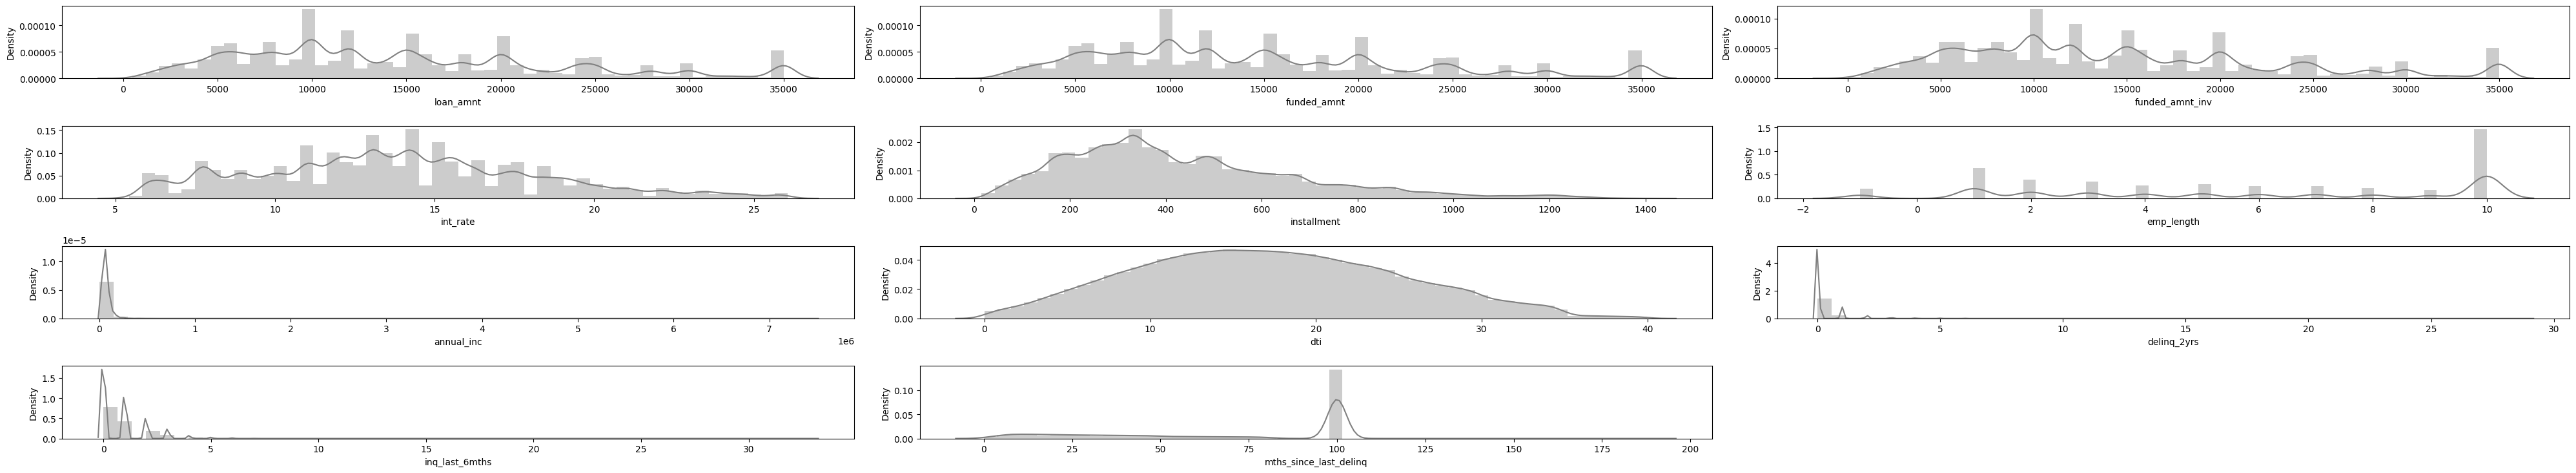

In [111]:
plt.figure(figsize=(40, 20))
for i in range(0, 11):
    plt.subplot(11, 3, i+1)
    sns.distplot(uni_dist.iloc[:,i], color='gray')
    plt.tight_layout()

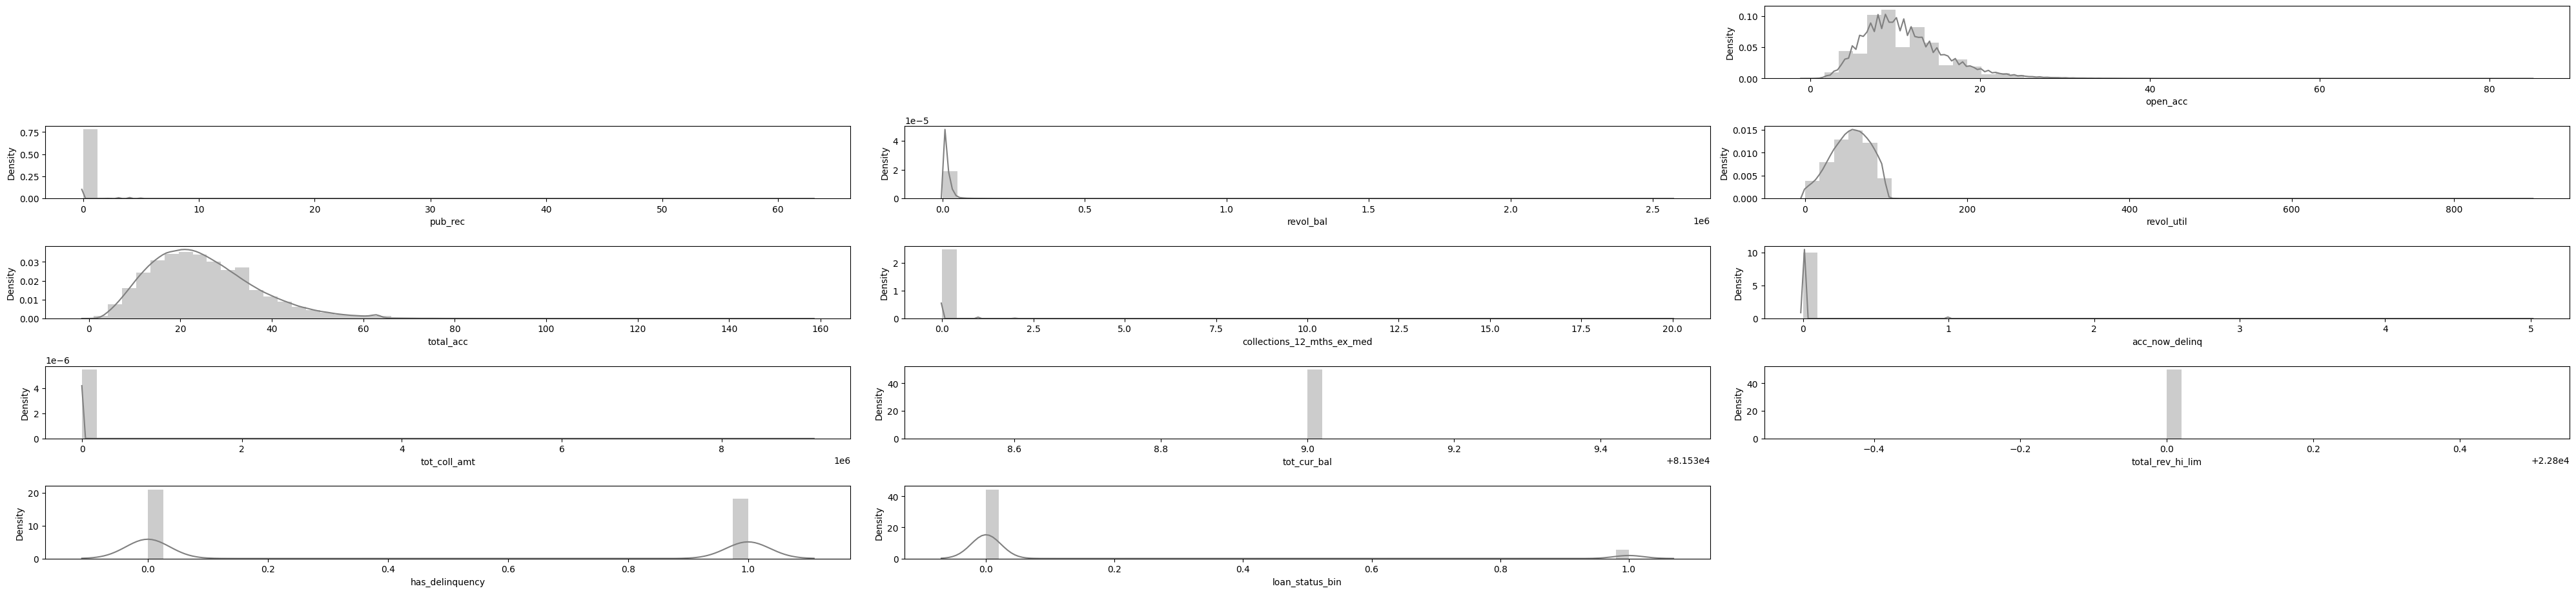

In [128]:
plt.figure(figsize=(40, 20))
for i in range(11, 23):
    plt.subplot(11, 3, i+1)
    sns.distplot(uni_dist.iloc[:,i], color='gray')
    plt.tight_layout()

* Most of the features are skewed
* Non skewed features: `loan_amnt`,`funded_amnt`,`funded_amnt_inv`,`int_rate`,`dti`

## Analysing Box Plot

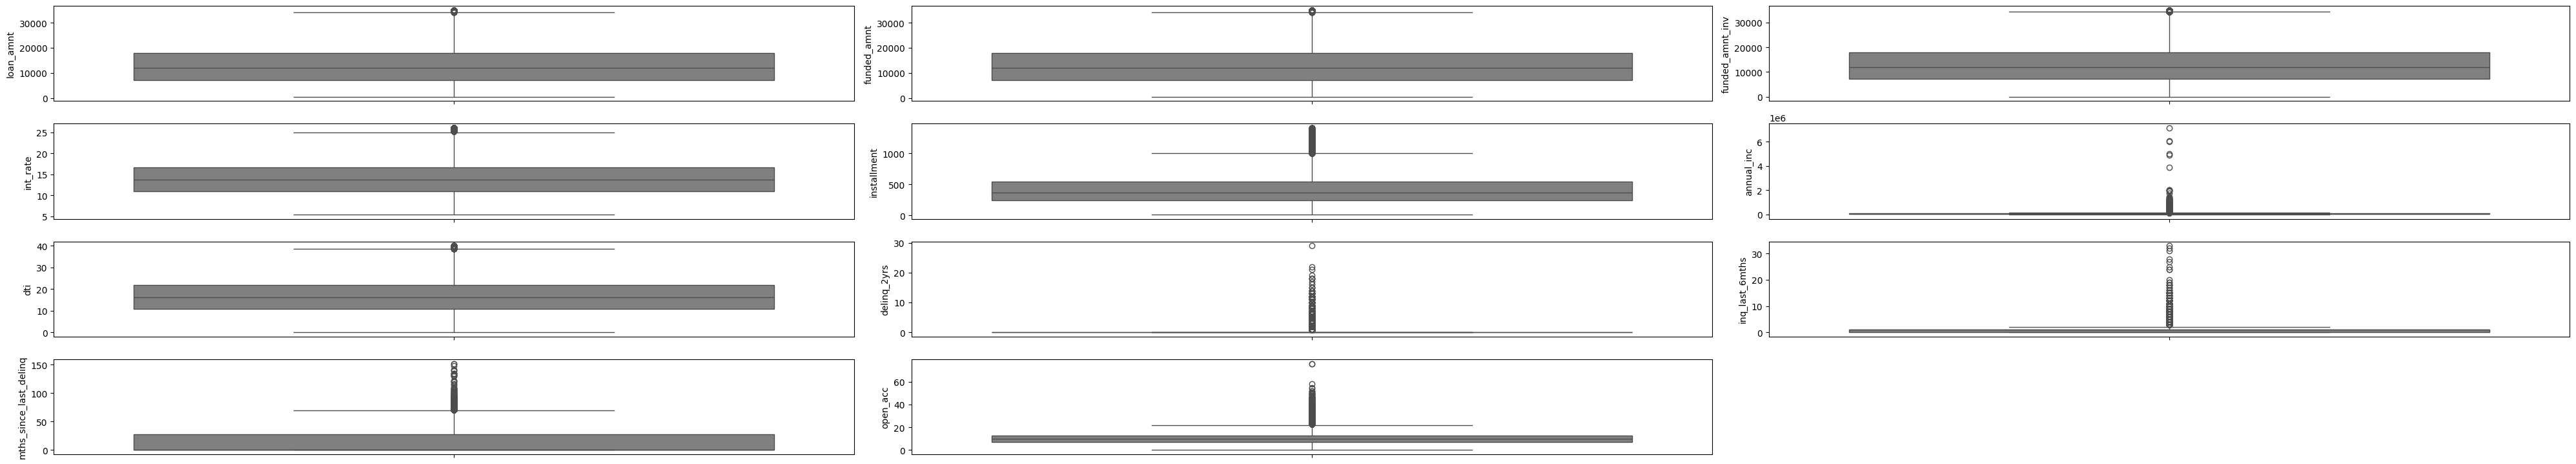

In [ ]:
plt.figure(figsize=(40, 20))
for i in range(0, 11):
    plt.subplot(11, 3, i+1)
    sns.boxplot(uni_dist.iloc[:,i], color='gray',orient='v')
    plt.tight_layout()

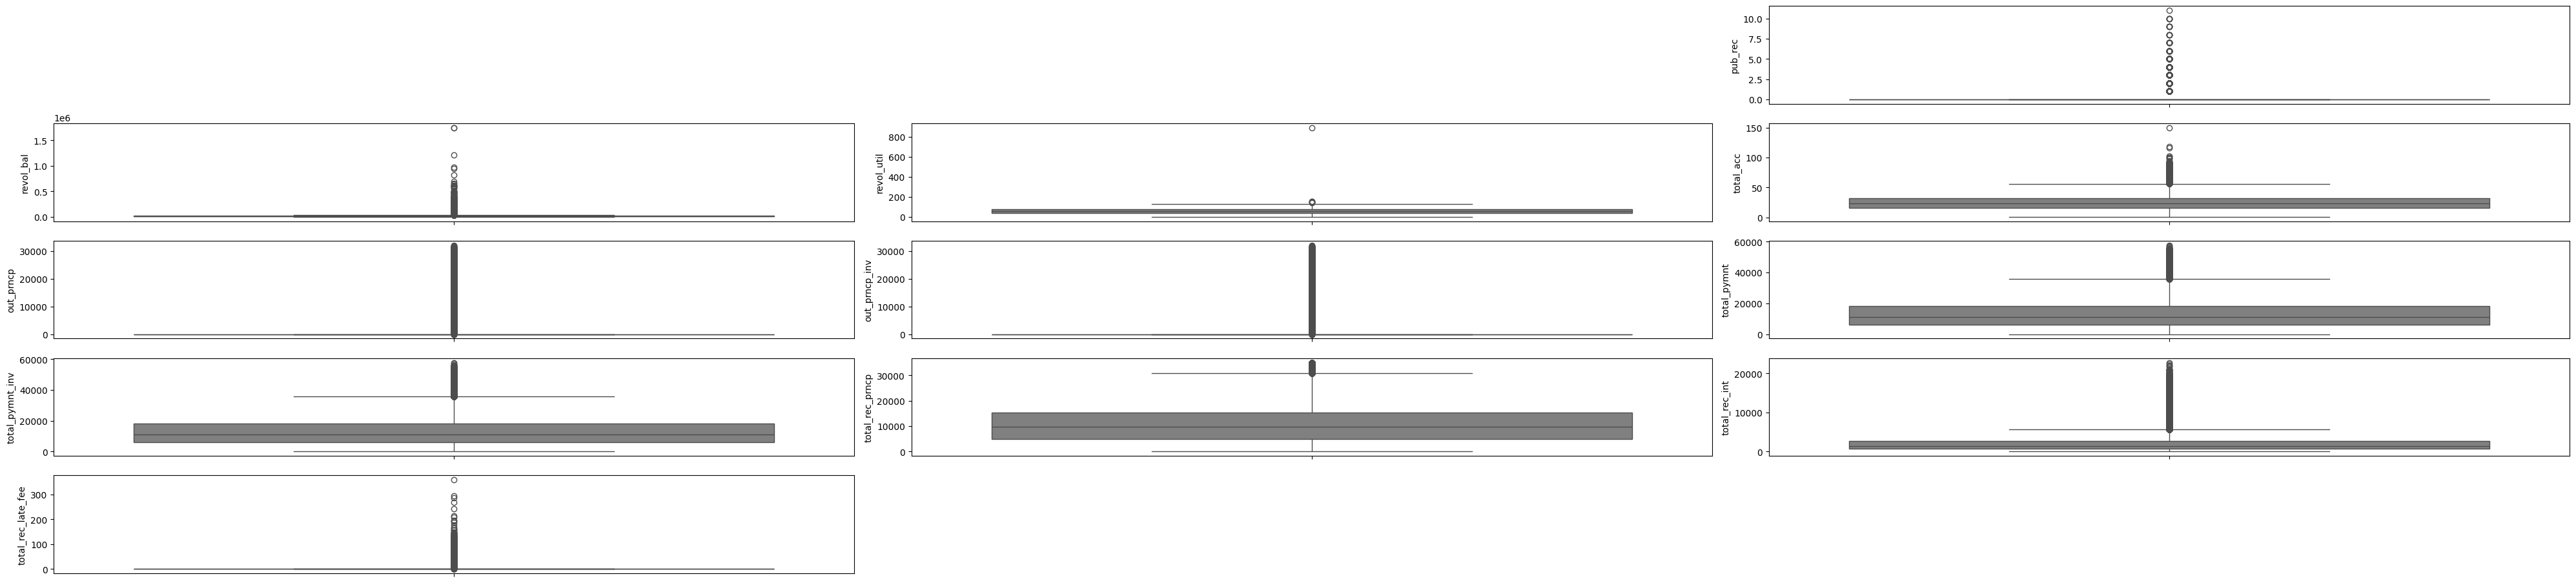

In [ ]:
plt.figure(figsize=(40, 20))
for i in range(11, 22):
    plt.subplot(11, 3, i+1)
    sns.boxplot(uni_dist.iloc[:,i], color='gray',orient='v')
    plt.tight_layout()

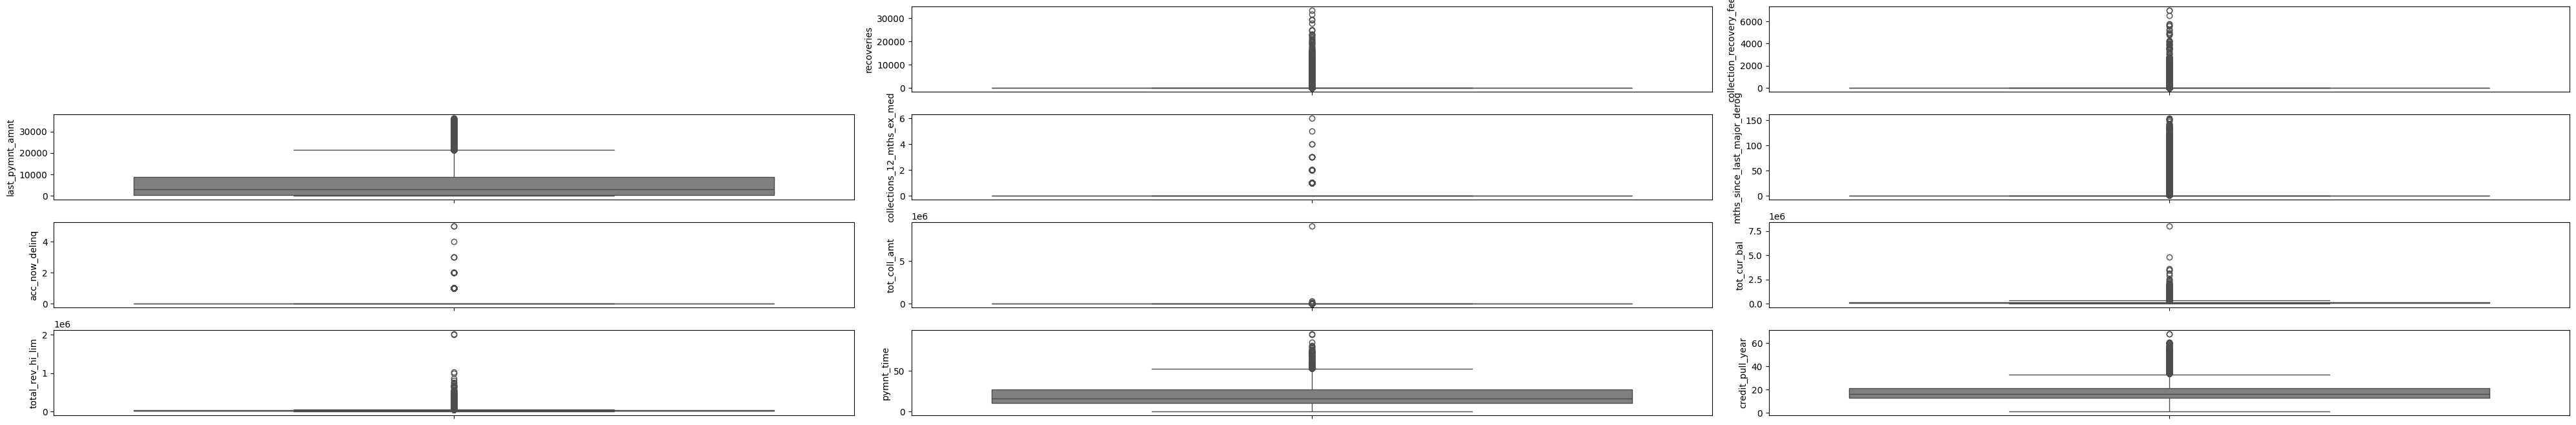

In [ ]:
plt.figure(figsize=(40, 20))
for i in range(22, 33):
    plt.subplot(12, 3, i+1)
    sns.boxplot(uni_dist.iloc[:,i], color='gray',orient='v')
    plt.tight_layout()

* Most of the features have outliers
* Features with no outliers: `loan_amnt`,`funded_amnt`,`funded_amnt_inv`,`int_rate`

Severe outliers:
* installment
* annual_inc
* open_acc
* revol_bal
* total_pymnt_inv
* out_prncp
* total_rec_late_fee
* out_prncp_inv
* total_rec_prncp
* total_pymnt
* total_acc
* total_rec_int
* last_pymnt_amnt
* total_rev_hi_lim
* recoveries
* total_coll_amt
* pymnt_time
* collection_recovery_fee
* tot_cur_bal
* credit_pull_year

## Correlation Analysis for Feature Selection

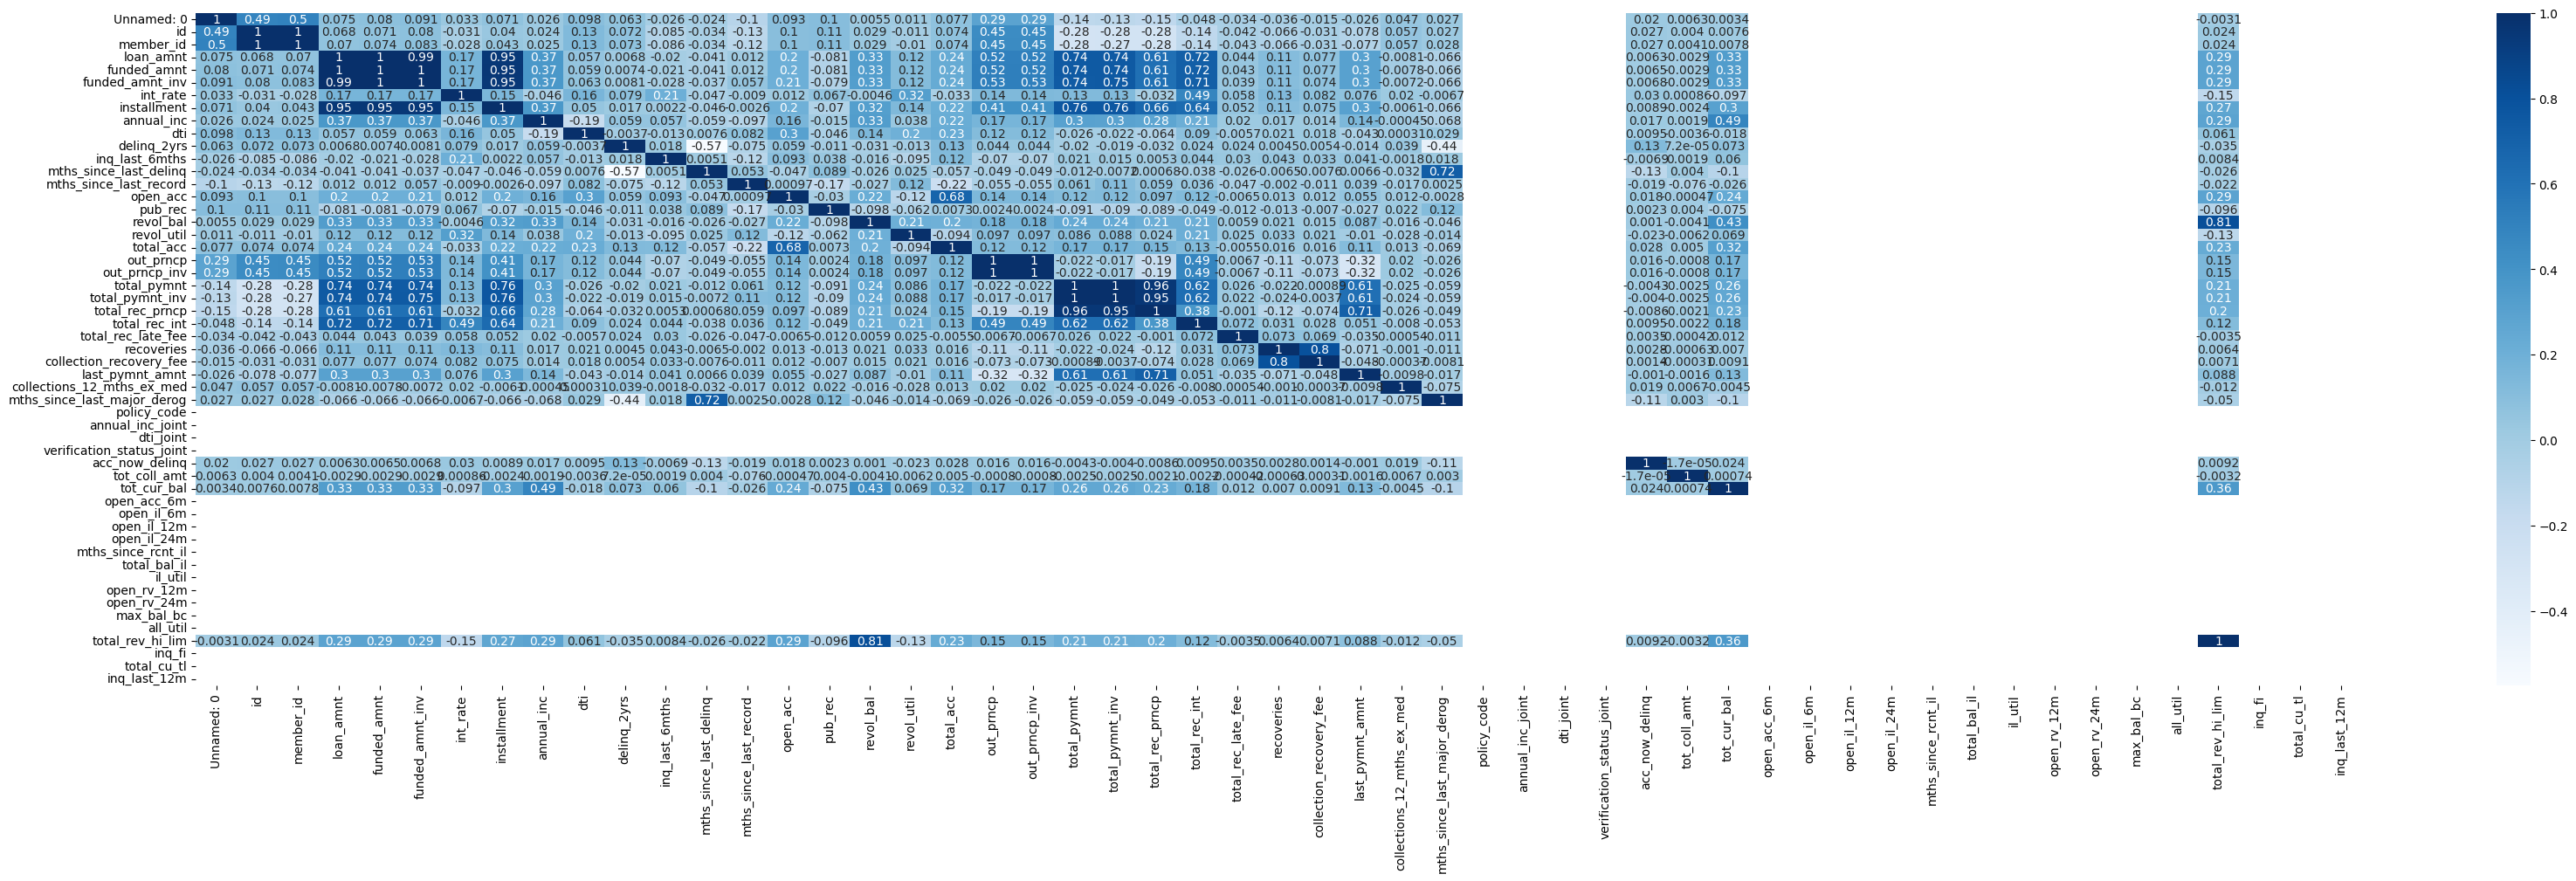

In [129]:
non_used = ['loan_status']
uni_dist = df_cred.select_dtypes(include=[np.float64,np.int64])
uni_dist = uni_dist[uni_dist.columns[~uni_dist.columns.isin(non_used)]]
fig = plt.figure(figsize = (40,10))
sns.heatmap(uni_dist.corr(),cmap='Blues', annot = True);

In [ ]:
def top_correlation (df,n):
    corr_matrix = df.corr()
    correlation = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
    correlation = pd.DataFrame(correlation).reset_index()
    correlation.columns=["Variable_1","Variable_2","Correlation"]
    correlation = correlation.reindex(correlation.Correlation.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
    return correlation.head(n)
print("High Correlated Features (Corr > 0.5)")
top_correlation(uni_dist,39)

High Correlated Features (Corr > 0.5)


Variable_1               Variable_2  Correlation
0         out_prncp            out_prncp_inv     0.999999
1         loan_amnt              funded_amnt     0.997286
2       total_pymnt          total_pymnt_inv     0.993913
3       funded_amnt          funded_amnt_inv     0.992104
4         loan_amnt          funded_amnt_inv     0.988784
5       total_pymnt          total_rec_prncp     0.973771
6   total_pymnt_inv          total_rec_prncp     0.968241
7       funded_amnt              installment     0.959611
8         loan_amnt              installment     0.955520
9   funded_amnt_inv              installment     0.951136
10  funded_amnt_inv          total_pymnt_inv     0.835570
11      funded_amnt              total_pymnt     0.832375
12        loan_amnt              total_pymnt     0.830804
13      funded_amnt          total_pymnt_inv     0.828757
14        loan_amnt          total_pymnt_inv     0.826653
15  funded_amnt_inv              total_pymnt     0.826480
16      installment              total_pymnt     0.813755
17      installment          total_pymnt_inv     0.809636
18       recoveries  collection_recovery_fee     0.798492
19      funded_amnt          total_rec_prncp     0.760778
20        loan_amnt          total_rec_prncp     0.758835
21  funded_amnt_inv          total_rec_prncp     0.755728
22      installment          total_rec_prncp     0.753844
23  total_rec_prncp          last_pymnt_amnt     0.746378
24        revol_bal         total_rev_hi_lim     0.702269
25      total_pymnt            total_rec_int     0.697936
26  total_pymnt_inv            total_rec_int     0.692453
27  total_pymnt_inv          last_pymnt_amnt     0.690224
28      total_pymnt          last_pymnt_amnt     0.687400
29        loan_amnt            total_rec_int     0.683451
30      funded_amnt            total_rec_int     0.682814
31  funded_amnt_inv            total_rec_int     0.677064
32         open_acc                total_acc     0.671941
33      installment            total_rec_int     0.635278
34  funded_amnt_inv          last_pymnt_amnt     0.547571
35      funded_amnt          last_pymnt_amnt     0.544878
36        loan_amnt          last_pymnt_amnt     0.542132
37  total_rec_prncp            total_rec_int     0.530427
38      installment          last_pymnt_amnt     0.489836

In [ ]:
df_corr = top_correlation(uni_dist,41)
df_corr.to_excel('df_corr_3.xlsx', index=False)
!cp 'df_corr_3.xlsx' '/content/drive/MyDrive/VIX DS ID X Partners'
print('Saving correlation data is done!')

cp: cannot create regular file '/content/drive/MyDrive/VIX DS ID X Partners': No such file or directory
Saving correlation data is done!


In [ ]:
uni_dist.head()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  annual_inc    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  mths_since_last_major_derog  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_pull_year
0       5000         5000           4975.0     10.65       162.87     24000.0  27.65          0.0             1.0                     0.0       3.0      0.0      13648        83.7        9.0        0.0            0.0   5861.071414          5831.78          5000.00         861.07                0.00        0.00                     0.00           171.62                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                31
1       2500         2500           2500.0     15.27        59.83     30000.0   1.00          0.0             5.0                     0.0       3.0      0.0       1687         9.4        4.0        0.0            0.0   1008.710000          1008.71           456.46         435.17                0.00      117.08                     1.11           119.66                         0.0                          0.0             0.0           0.0      81539.0           22800.0          16                14
2       2400         2400           2400.0     15.96        84.33     12252.0   8.72          0.0             2.0                     0.0       2.0      0.0       2956        98.5       10.0        0.0            0.0   3003.653644          3003.65          2400.00         603.65                0.00        0.00                     0.00           649.91                         0.0                          0.0             0.0           0.0      81539.0           22800.0          30                15
3      10000        10000          10000.0     13.49       339.31     49200.0  20.00          0.0             1.0                    35.0      10.0      0.0       5598        21.0       37.0        0.0            0.0  12226.302210         12226.30         10000.00        2209.33               16.97        0.00                     0.00           357.48                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                19
4       5000         5000           5000.0      7.90       156.46     36000.0  11.20          0.0             3.0                     0.0       9.0      0.0       7963        28.3       12.0        0.0            0.0   5631.377753          5631.38          5000.00         631.38                0.00        0.00                     0.00           161.03                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                11

* `emp_title`, `url`,`title`, `zip_code`, `earliest_cr_line` has more than 500 unique values
* `last_credit_pull_d`,`last_pymnt_d`,`issue_d`,`addr_state` have at least 50 unique values (below 500)
* `application_type` only have single unique value

In [ ]:
removed_unused = ['Unnamed: 0','id','member_id','policy_code','emp_title','url','title','zip_code','earliest_cr_line']
multicol = ['last_credit_pull_d','last_pymnt_d','issue_d','addr_state','application_type',
            'out_prncp_inv','funded_amnt','total_pymnt_inv','funded_amnt_inv','total_rec_prncp','out_prncp',
            'revol_bal','total_pymnt','recoveries','total_rec_int','total_acc','loan_amnt']
removed_all = removed_unused + multicol

In [ ]:
df_cred_a = df_cred[df_cred.columns[~df_cred.columns.isin(removed_all)]].reset_index(drop=True)
df_cred_b = df_cred[df_cred.columns[~df_cred.columns.isin(removed_unused)]].reset_index(drop=True)

In [ ]:
df_cred_b.shape

(237695, 48)

In [ ]:
df_cred_a.shape

(237695, 31)

In [ ]:
df_cred_b.head()

loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc verification_status     issue_d  loan_status pymnt_plan         purpose addr_state    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_pull_year
0       5000         5000           4975.0  36 months     10.65       162.87     B        B2  10+ years           RENT     24000.0            Verified  2011-12-01            1          n     credit_card         AZ  27.65          0.0             1.0                     0.0       3.0      0.0      13648        83.7        9.0                   f        0.0            0.0   5861.071414          5831.78          5000.00         861.07                0.00        0.00                     0.00   2015-01-01           171.62         2016-01-01                         0.0                          0.0       INDIVIDUAL             0.0           0.0      81539.0           22800.0          37                31
1       2500         2500           2500.0  60 months     15.27        59.83     C        C4   < 1 year           RENT     30000.0     Source Verified  2011-12-01            0          n             car         GA   1.00          0.0             5.0                     0.0       3.0      0.0       1687         9.4        4.0                   f        0.0            0.0   1008.710000          1008.71           456.46         435.17                0.00      117.08                     1.11   2013-04-01           119.66         2013-09-01                         0.0                          0.0       INDIVIDUAL             0.0           0.0      81539.0           22800.0          16                14
2       2400         2400           2400.0  36 months     15.96        84.33     C        C5  10+ years           RENT     12252.0        Not Verified  2011-12-01            1          n  small_business         IL   8.72          0.0             2.0                     0.0       2.0      0.0       2956        98.5       10.0                   f        0.0            0.0   3003.653644          3003.65          2400.00         603.65                0.00        0.00                     0.00   2014-06-01           649.91         2016-01-01                         0.0                          0.0       INDIVIDUAL             0.0           0.0      81539.0           22800.0          30                15
3      10000        10000          10000.0  36 months     13.49       339.31     C        C1  10+ years           RENT     49200.0     Source Verified  2011-12-01            1          n           other         CA  20.00          0.0             1.0                    35.0      10.0      0.0       5598        21.0       37.0                   f        0.0            0.0  12226.302210         12226.30         10000.00        2209.33               16.97        0.00                     0.00   2015-01-01           357.48         2015-01-01                         0.0                          0.0       INDIVIDUAL             0.0           0.0      81539.0           22800.0          37                19
4       5000         5000           5000.0  36 months      7.90       156.46     A        A4    3 years           RENT     36000.0     Source Verified  2011-12-01            1          n         wedding         AZ  11.20          0.0             3.0                     0.0       9.0      0.0       7963        28.3       12.0                   f        0.0            0.0   5631.377753          5631.38          5000.00         631.38                0.00        0.00 

In [ ]:
df_cred_a.to_csv('df_cred_a.csv', index=False)
!cp 'df_cred_a.csv' '/content/drive/MyDrive/VIX DS ID X Partners'
print('Saving cleaned data is done!')

df_cred_b.to_csv('df_cred_b.csv', index=False)
!cp 'df_cred_b.csv' '/content/drive/MyDrive/VIX DS ID X Partners'
print('Saving cleaned data is done!')

cp: cannot create regular file '/content/drive/MyDrive/VIX DS ID X Partners': No such file or directory
Saving cleaned data is done!
cp: cannot create regular file '/content/drive/MyDrive/VIX DS ID X Partners': No such file or directory
Saving cleaned data is done!


## Categorical Encoding

In [ ]:
df_cred_a = pd.read_csv('df_cred_a.csv')
df_cred_a.head(2)

term  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc verification_status  loan_status pymnt_plan      purpose    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_util initial_list_status  total_rec_late_fee  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  mths_since_last_major_derog  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_pull_year
0  36 months     10.65       162.87     B        B2  10+ years           RENT     24000.0            Verified            1          n  credit_card  27.65          0.0             1.0                     0.0       3.0      0.0        83.7                   f                 0.0                     0.00           171.62                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                31
1  60 months     15.27        59.83     C        C4   < 1 year           RENT     30000.0     Source Verified            0          n          car   1.00          0.0             5.0                     0.0       3.0      0.0         9.4                   f                 0.0                     1.11           119.66                         0.0                          0.0             0.0           0.0      81539.0           22800.0          16                14

In [ ]:
df_cred_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   term                         237695 non-null  object 
 1   int_rate                     237695 non-null  float64
 2   installment                  237695 non-null  float64
 3   grade                        237695 non-null  object 
 4   sub_grade                    237695 non-null  object 
 5   emp_length                   237695 non-null  object 
 6   home_ownership               237695 non-null  object 
 7   annual_inc                   237695 non-null  float64
 8   verification_status          237695 non-null  object 
 9   loan_status                  237695 non-null  int64  
 10  pymnt_plan                   237695 non-null  object 
 11  purpose                      237695 non-null  object 
 12  dti                          237695 non-null  float64
 13 

In [ ]:
df_cred_b = pd.read_csv('df_cred_b.csv')
df_cred_b.head(2)

loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc verification_status     issue_d  loan_status pymnt_plan      purpose addr_state    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_pull_year
0       5000         5000           4975.0  36 months     10.65       162.87     B        B2  10+ years           RENT     24000.0            Verified  2011-12-01            1          n  credit_card         AZ  27.65          0.0             1.0                     0.0       3.0      0.0      13648        83.7        9.0                   f        0.0            0.0  5861.071414          5831.78          5000.00         861.07                 0.0        0.00                     0.00   2015-01-01           171.62         2016-01-01                         0.0                          0.0       INDIVIDUAL             0.0           0.0      81539.0           22800.0          37                31
1       2500         2500           2500.0  60 months     15.27        59.83     C        C4   < 1 year           RENT     30000.0     Source Verified  2011-12-01            0          n          car         GA   1.00          0.0             5.0                     0.0       3.0      0.0       1687         9.4        4.0                   f        0.0            0.0  1008.710000          1008.71           456.46         435.17                 0.0      117.08                     1.11   2013-04-01           119.66         2013-09-01                         0.0                          0.0       INDIVIDUAL             0.0           0.0      81539.0           22800.0          16                14

In [ ]:
df_cred_a["term"].unique()

array(['36 months', '60 months'], dtype=object)

In [ ]:
def text_num(text):
  return [int(s) for s in text.split() if s.isdigit()][0]

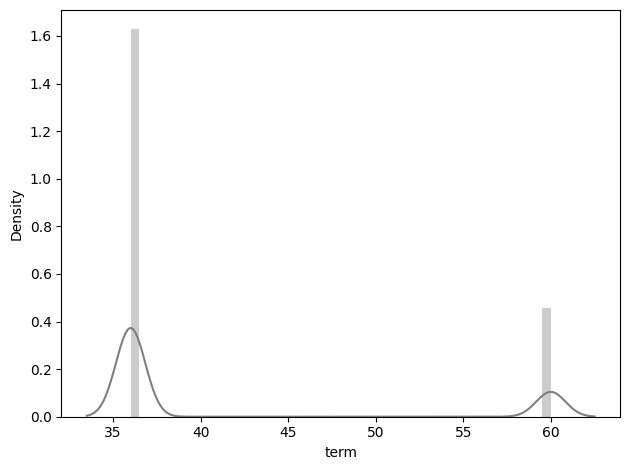

In [ ]:
sns.distplot(df_cred_a["term"].apply(lambda x: text_num(x)), color='gray')
plt.tight_layout()
plt.show()

In [ ]:
df_cred_a["term"] = df_cred_a["term"].apply(lambda x: text_num(x))
df_cred_a.head()

term  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc verification_status  loan_status pymnt_plan         purpose    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_util initial_list_status  total_rec_late_fee  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  mths_since_last_major_derog  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_pull_year
0    36     10.65       162.87     B        B2  10+ years           RENT     24000.0            Verified            1          n     credit_card  27.65          0.0             1.0                     0.0       3.0      0.0        83.7                   f                0.00                     0.00           171.62                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                31
1    60     15.27        59.83     C        C4   < 1 year           RENT     30000.0     Source Verified            0          n             car   1.00          0.0             5.0                     0.0       3.0      0.0         9.4                   f                0.00                     1.11           119.66                         0.0                          0.0             0.0           0.0      81539.0           22800.0          16                14
2    36     15.96        84.33     C        C5  10+ years           RENT     12252.0        Not Verified            1          n  small_business   8.72          0.0             2.0                     0.0       2.0      0.0        98.5                   f                0.00                     0.00           649.91                         0.0                          0.0             0.0           0.0      81539.0           22800.0          30                15
3    36     13.49       339.31     C        C1  10+ years           RENT     49200.0     Source Verified            1          n           other  20.00          0.0             1.0                    35.0      10.0      0.0        21.0                   f               16.97                     0.00           357.48                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                19
4    36      7.90       156.46     A        A4    3 years           RENT     36000.0     Source Verified            1          n         wedding  11.20          0.0             3.0                     0.0       9.0      0.0        28.3                   f                0.00                     0.00           161.03                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                11

In [ ]:
df_cred_a["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [ ]:
# Define a dictionary for encoding ordinal variable
target_dict = {'A':6,
               'B':5,
               'C':4,
               'D':3,
               'E':2,
               'F':1,
               'G':0}
# Create the mapped values in a new column
df_cred_a["grade"] = df_cred_a["grade"].map(target_dict)

In [ ]:
# Review dataset
df_cred_a.head()

term  int_rate  installment  grade sub_grade emp_length home_ownership  annual_inc verification_status  loan_status pymnt_plan         purpose    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_util initial_list_status  total_rec_late_fee  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  mths_since_last_major_derog  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_pull_year
0    36     10.65       162.87      5        B2  10+ years           RENT     24000.0            Verified            1          n     credit_card  27.65          0.0             1.0                     0.0       3.0      0.0        83.7                   f                0.00                     0.00           171.62                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                31
1    60     15.27        59.83      4        C4   < 1 year           RENT     30000.0     Source Verified            0          n             car   1.00          0.0             5.0                     0.0       3.0      0.0         9.4                   f                0.00                     1.11           119.66                         0.0                          0.0             0.0           0.0      81539.0           22800.0          16                14
2    36     15.96        84.33      4        C5  10+ years           RENT     12252.0        Not Verified            1          n  small_business   8.72          0.0             2.0                     0.0       2.0      0.0        98.5                   f                0.00                     0.00           649.91                         0.0                          0.0             0.0           0.0      81539.0           22800.0          30                15
3    36     13.49       339.31      4        C1  10+ years           RENT     49200.0     Source Verified            1          n           other  20.00          0.0             1.0                    35.0      10.0      0.0        21.0                   f               16.97                     0.00           357.48                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                19
4    36      7.90       156.46      6        A4    3 years           RENT     36000.0     Source Verified            1          n         wedding  11.20          0.0             3.0                     0.0       9.0      0.0        28.3                   f                0.00                     0.00           161.03                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                11

In [ ]:
df_cred_a["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [ ]:
def f_A(row):
    if row == 'A1':
        val = 1
    elif row == 'A2':
        val = 2
    elif row == 'A3':
        val = 3
    elif row == 'A4':
        val = 4
    elif row == 'A5':
        val = 5
    else:
        val = 0
    return val

def f_B(row):
    if row == 'B1':
        val = 1
    elif row == 'B2':
        val = 2
    elif row == 'B3':
        val = 3
    elif row == 'B4':
        val = 4
    elif row == 'B5':
        val = 5
    else:
        val = 0
    return val

def f_C(row):
    if row == 'C1':
        val = 1
    elif row == 'C2':
        val = 2
    elif row == 'C3':
        val = 3
    elif row == 'C4':
        val = 4
    elif row == 'C5':
        val = 5
    else:
        val = 0
    return val

def f_D(row):
    if row == 'D1':
        val = 1
    elif row == 'D2':
        val = 2
    elif row == 'D3':
        val = 3
    elif row == 'D4':
        val = 4
    elif row == 'D5':
        val = 5
    else:
        val = 0
    return val

def f_E(row):
    if row == 'E1':
        val = 1
    elif row == 'E2':
        val = 2
    elif row == 'E3':
        val = 3
    elif row == 'E4':
        val = 4
    elif row == 'E5':
        val = 5
    else:
        val = 0
    return val

def f_F(row):
    if row == 'F1':
        val = 1
    elif row == 'F2':
        val = 2
    elif row == 'F3':
        val = 3
    elif row == 'F4':
        val = 4
    elif row == 'F5':
        val = 5
    else:
        val = 0
    return val

def f_G(row):
    if row == 'G1':
        val = 1
    elif row == 'G2':
        val = 2
    elif row == 'G3':
        val = 3
    elif row == 'G4':
        val = 4
    elif row == 'G5':
        val = 5
    else:
        val = 0
    return val

In [ ]:
df_cred_a['SubGrade_A'] = df_cred_a["sub_grade"].apply(f_A)
df_cred_a['SubGrade_B'] = df_cred_a["sub_grade"].apply(f_B)
df_cred_a['SubGrade_C'] = df_cred_a["sub_grade"].apply(f_C)
df_cred_a['SubGrade_D'] = df_cred_a["sub_grade"].apply(f_D)
df_cred_a['SubGrade_E'] = df_cred_a["sub_grade"].apply(f_E)
df_cred_a['SubGrade_F'] = df_cred_a["sub_grade"].apply(f_F)
df_cred_a['SubGrade_G'] = df_cred_a["sub_grade"].apply(f_G)
df_cred_a = df_cred_a.drop(axis=1, columns="sub_grade")

In [ ]:
df_cred_a.head()

term  int_rate  installment  grade emp_length home_ownership  annual_inc verification_status  loan_status pymnt_plan         purpose    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_util initial_list_status  total_rec_late_fee  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  mths_since_last_major_derog  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_pull_year  SubGrade_A  SubGrade_B  SubGrade_C  SubGrade_D  SubGrade_E  SubGrade_F  SubGrade_G
0    36     10.65       162.87      5  10+ years           RENT     24000.0            Verified            1          n     credit_card  27.65          0.0             1.0                     0.0       3.0      0.0        83.7                   f                0.00                     0.00           171.62                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                31           0           2           0           0           0           0           0
1    60     15.27        59.83      4   < 1 year           RENT     30000.0     Source Verified            0          n             car   1.00          0.0             5.0                     0.0       3.0      0.0         9.4                   f                0.00                     1.11           119.66                         0.0                          0.0             0.0           0.0      81539.0           22800.0          16                14           0           0           4           0           0           0           0
2    36     15.96        84.33      4  10+ years           RENT     12252.0        Not Verified            1          n  small_business   8.72          0.0             2.0                     0.0       2.0      0.0        98.5                   f                0.00                     0.00           649.91                         0.0                          0.0             0.0           0.0      81539.0           22800.0          30                15           0           0           5           0           0           0           0
3    36     13.49       339.31      4  10+ years           RENT     49200.0     Source Verified            1          n           other  20.00          0.0             1.0                    35.0      10.0      0.0        21.0                   f               16.97                     0.00           357.48                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                19           0           0           1           0           0           0           0
4    36      7.90       156.46      6    3 years           RENT     36000.0     Source Verified            1          n         wedding  11.20          0.0             3.0                     0.0       9.0      0.0        28.3                   f                0.00                     0.00           161.03                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                11           4           0           0           0           0           0           0

In [ ]:
df_cred_a["emp_length"].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years'],
      dtype=object)

In [ ]:
# Define a dictionary for encoding ordinal variable
target_dict = {'< 1 year':0,
               '1 year':1,
               '2 years':2,
               '3 years':3,
               '4 years':4,
               '5 years':5,
               '6 years':6,
               '7 years':7,
               '8 years':8,
               '9 years':9,
               '10+ years':10}
# Create the mapped values in a new column
df_cred_a["emp_length"] = df_cred_a["emp_length"].map(target_dict)

In [ ]:
df_cred_a.head()

term  int_rate  installment  grade  emp_length home_ownership  annual_inc verification_status  loan_status pymnt_plan         purpose    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_util initial_list_status  total_rec_late_fee  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  mths_since_last_major_derog  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_pull_year  SubGrade_A  SubGrade_B  SubGrade_C  SubGrade_D  SubGrade_E  SubGrade_F  SubGrade_G
0    36     10.65       162.87      5          10           RENT     24000.0            Verified            1          n     credit_card  27.65          0.0             1.0                     0.0       3.0      0.0        83.7                   f                0.00                     0.00           171.62                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                31           0           2           0           0           0           0           0
1    60     15.27        59.83      4           0           RENT     30000.0     Source Verified            0          n             car   1.00          0.0             5.0                     0.0       3.0      0.0         9.4                   f                0.00                     1.11           119.66                         0.0                          0.0             0.0           0.0      81539.0           22800.0          16                14           0           0           4           0           0           0           0
2    36     15.96        84.33      4          10           RENT     12252.0        Not Verified            1          n  small_business   8.72          0.0             2.0                     0.0       2.0      0.0        98.5                   f                0.00                     0.00           649.91                         0.0                          0.0             0.0           0.0      81539.0           22800.0          30                15           0           0           5           0           0           0           0
3    36     13.49       339.31      4          10           RENT     49200.0     Source Verified            1          n           other  20.00          0.0             1.0                    35.0      10.0      0.0        21.0                   f               16.97                     0.00           357.48                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                19           0           0           1           0           0           0           0
4    36      7.90       156.46      6           3           RENT     36000.0     Source Verified            1          n         wedding  11.20          0.0             3.0                     0.0       9.0      0.0        28.3                   f                0.00                     0.00           161.03                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                11           4           0           0           0           0           0           0

In [ ]:
df_cred_a["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [ ]:
df_cred_a["home_ownership"].value_counts()

home_ownership
MORTGAGE    116769
RENT        100703
OWN          19995
OTHER          179
NONE            48
ANY              1
Name: count, dtype: int64

* ANY, OTHER, and NONE will be aggregated into OTHER
* Then I used One-Hot-Encoding for this feature

In [ ]:
# Define a dictionary for aggregating variable
target_dict = {'MORTGAGE':'MORTGAGE',
               'RENT':'RENT',
               'OWN':'OWN',
               'OTHER':'OTHER',
               'ANY':'OTHER',
               'NONE':'OTHER'}
# Create the mapped values in a new column
df_cred_a["home_ownership"] = df_cred_a["home_ownership"].map(target_dict)

In [ ]:
df_cred_a.head()

term  int_rate  installment  grade  emp_length home_ownership  annual_inc verification_status  loan_status pymnt_plan         purpose    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_util initial_list_status  total_rec_late_fee  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  mths_since_last_major_derog  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_pull_year  SubGrade_A  SubGrade_B  SubGrade_C  SubGrade_D  SubGrade_E  SubGrade_F  SubGrade_G
0    36     10.65       162.87      5          10           RENT     24000.0            Verified            1          n     credit_card  27.65          0.0             1.0                     0.0       3.0      0.0        83.7                   f                0.00                     0.00           171.62                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                31           0           2           0           0           0           0           0
1    60     15.27        59.83      4           0           RENT     30000.0     Source Verified            0          n             car   1.00          0.0             5.0                     0.0       3.0      0.0         9.4                   f                0.00                     1.11           119.66                         0.0                          0.0             0.0           0.0      81539.0           22800.0          16                14           0           0           4           0           0           0           0
2    36     15.96        84.33      4          10           RENT     12252.0        Not Verified            1          n  small_business   8.72          0.0             2.0                     0.0       2.0      0.0        98.5                   f                0.00                     0.00           649.91                         0.0                          0.0             0.0           0.0      81539.0           22800.0          30                15           0           0           5           0           0           0           0
3    36     13.49       339.31      4          10           RENT     49200.0     Source Verified            1          n           other  20.00          0.0             1.0                    35.0      10.0      0.0        21.0                   f               16.97                     0.00           357.48                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                19           0           0           1           0           0           0           0
4    36      7.90       156.46      6           3           RENT     36000.0     Source Verified            1          n         wedding  11.20          0.0             3.0                     0.0       9.0      0.0        28.3                   f                0.00                     0.00           161.03                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                11           4           0           0           0           0           0           0

In [ ]:
encoder = OneHotEncoder(sparse=False)
df_cred_a_encoded = pd.DataFrame(encoder.fit_transform(df_cred_a[["home_ownership"]]))
df_cred_a_encoded.columns = encoder.get_feature_names(["home_ownership"])
df_cred_a = pd.concat([df_cred_a, df_cred_a_encoded], axis=1)
df_cred_a.drop(["home_ownership"] ,axis=1, inplace=True)
df_cred_a.head()

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
df_cred_a["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [ ]:
df_cred_a["verification_status"].value_counts()

Verified           88337
Not Verified       82760
Source Verified    66598
Name: verification_status, dtype: int64

In [ ]:
encoder = OneHotEncoder(sparse=False)
df_cred_a_encoded = pd.DataFrame(encoder.fit_transform(df_cred_a[["verification_status"]]))
df_cred_a_encoded.columns = encoder.get_feature_names(["verification_status"])
df_cred_a = pd.concat([df_cred_a, df_cred_a_encoded], axis=1)
df_cred_a.drop(["verification_status"] ,axis=1, inplace=True)
df_cred_a.head()

term  int_rate  installment  grade  emp_length  annual_inc  loan_status pymnt_plan         purpose    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_util initial_list_status  total_rec_late_fee  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  mths_since_last_major_derog  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_pull_year  SubGrade_A  SubGrade_B  SubGrade_C  SubGrade_D  SubGrade_E  SubGrade_F  SubGrade_G  home_ownership_MORTGAGE  home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  verification_status_Not Verified  verification_status_Source Verified  verification_status_Verified
0    36     10.65       162.87      5          10     24000.0            1          n     credit_card  27.65          0.0             1.0                     0.0       3.0      0.0        83.7                   f                0.00                     0.00           171.62                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                31           0           2           0           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               0.0                                  0.0                           1.0
1    60     15.27        59.83      4           0     30000.0            0          n             car   1.00          0.0             5.0                     0.0       3.0      0.0         9.4                   f                0.00                     1.11           119.66                         0.0                          0.0             0.0           0.0      81539.0           22800.0          16                14           0           0           4           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               0.0                                  1.0                           0.0
2    36     15.96        84.33      4          10     12252.0            1          n  small_business   8.72          0.0             2.0                     0.0       2.0      0.0        98.5                   f                0.00                     0.00           649.91                         0.0                          0.0             0.0           0.0      81539.0           22800.0          30                15           0           0           5           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               1.0                                  0.0                           0.0
3    36     13.49       339.31      4          10     49200.0            1          n           other  20.00          0.0             1.0                    35.0      10.0      0.0        21.0                   f               16.97                     0.00           357.48                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                19           0           0           1           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               0.0                                  1.0                           0.0
4    36      7.90       156.46      6           3     36000.0            1          n         wedding  11.20          0.0             3.0                     0.0       9.0      0.0        28.3                   f                0.00                     0.00           161.03                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                11           4           0           0           0           0           0           0                 

In [ ]:
df_cred_a['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [ ]:
# Define a dictionary for encoding ordinal variable
target_dict = {'n':0,
               'y':1}
# Create the mapped values in a new column
df_cred_a["pymnt_plan"] = df_cred_a["pymnt_plan"].map(target_dict)

In [ ]:
df_cred_a.head()

term  int_rate  installment  grade  emp_length  annual_inc  loan_status  pymnt_plan         purpose    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_util initial_list_status  total_rec_late_fee  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  mths_since_last_major_derog  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_pull_year  SubGrade_A  SubGrade_B  SubGrade_C  SubGrade_D  SubGrade_E  SubGrade_F  SubGrade_G  home_ownership_MORTGAGE  home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  verification_status_Not Verified  verification_status_Source Verified  verification_status_Verified
0    36     10.65       162.87      5          10     24000.0            1           0     credit_card  27.65          0.0             1.0                     0.0       3.0      0.0        83.7                   f                0.00                     0.00           171.62                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                31           0           2           0           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               0.0                                  0.0                           1.0
1    60     15.27        59.83      4           0     30000.0            0           0             car   1.00          0.0             5.0                     0.0       3.0      0.0         9.4                   f                0.00                     1.11           119.66                         0.0                          0.0             0.0           0.0      81539.0           22800.0          16                14           0           0           4           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               0.0                                  1.0                           0.0
2    36     15.96        84.33      4          10     12252.0            1           0  small_business   8.72          0.0             2.0                     0.0       2.0      0.0        98.5                   f                0.00                     0.00           649.91                         0.0                          0.0             0.0           0.0      81539.0           22800.0          30                15           0           0           5           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               1.0                                  0.0                           0.0
3    36     13.49       339.31      4          10     49200.0            1           0           other  20.00          0.0             1.0                    35.0      10.0      0.0        21.0                   f               16.97                     0.00           357.48                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                19           0           0           1           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               0.0                                  1.0                           0.0
4    36      7.90       156.46      6           3     36000.0            1           0         wedding  11.20          0.0             3.0                     0.0       9.0      0.0        28.3                   f                0.00                     0.00           161.03                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                11           4           0           0           0           0           0           0           

In [ ]:
df_cred_a["loan_status"].unique()

array([1, 0])

In [ ]:
df_cred_a["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [ ]:
df_cred_a["purpose"].value_counts()

debt_consolidation    138318
credit_card            47421
home_improvement       13824
other                  13635
major_purchase          5951
small_business          4766
car                     3498
medical                 2706
wedding                 2017
moving                  1892
house                   1533
vacation                1456
educational              422
renewable_energy         256
Name: purpose, dtype: int64

* home_improvement, car, medical, wedding, moving, house, vacation, educational can be aggregated into private_use
* renewable_energy can be aggregated into other

In [ ]:
# Define a dictionary for aggregating variable
target_dict = {'debt_consolidation':'debt_consolidation',
               'credit_card':'credit_card',
               'home_improvement':'private_use',
               'other':'other',
               'major_purchase':'major_purchase',
               'small_business':'small_business',
               'car':'private_use',
               'medical':'private_use',
               'wedding':'private_use',
               'moving':'private_use',
               'house':'private_use',
               'vacation':'private_use',
               'educational':'private_use',
               'renewable_energy':'other'}
# Create the mapped values in a new column
df_cred_a["purpose"] = df_cred_a["purpose"].map(target_dict)

In [ ]:
df_cred_a["purpose"].value_counts()

debt_consolidation    138318
credit_card            47421
private_use            27348
other                  13891
major_purchase          5951
small_business          4766
Name: purpose, dtype: int64

In [ ]:
encoder = OneHotEncoder(sparse=False)
df_cred_a_encoded = pd.DataFrame(encoder.fit_transform(df_cred_a[["purpose"]]))
df_cred_a_encoded.columns = encoder.get_feature_names(["purpose"])
df_cred_a = pd.concat([df_cred_a, df_cred_a_encoded], axis=1)
df_cred_a.drop(["purpose"] ,axis=1, inplace=True)
df_cred_a.head()

term  int_rate  installment  grade  emp_length  annual_inc  loan_status  pymnt_plan    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_util initial_list_status  total_rec_late_fee  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  mths_since_last_major_derog  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_pull_year  SubGrade_A  SubGrade_B  SubGrade_C  SubGrade_D  SubGrade_E  SubGrade_F  SubGrade_G  home_ownership_MORTGAGE  home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  verification_status_Not Verified  verification_status_Source Verified  verification_status_Verified  purpose_credit_card  purpose_debt_consolidation  purpose_major_purchase  purpose_other  purpose_private_use  purpose_small_business
0    36     10.65       162.87      5          10     24000.0            1           0  27.65          0.0             1.0                     0.0       3.0      0.0        83.7                   f                0.00                     0.00           171.62                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                31           0           2           0           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               0.0                                  0.0                           1.0                  1.0                         0.0                     0.0            0.0                  0.0                     0.0
1    60     15.27        59.83      4           0     30000.0            0           0   1.00          0.0             5.0                     0.0       3.0      0.0         9.4                   f                0.00                     1.11           119.66                         0.0                          0.0             0.0           0.0      81539.0           22800.0          16                14           0           0           4           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               0.0                                  1.0                           0.0                  0.0                         0.0                     0.0            0.0                  1.0                     0.0
2    36     15.96        84.33      4          10     12252.0            1           0   8.72          0.0             2.0                     0.0       2.0      0.0        98.5                   f                0.00                     0.00           649.91                         0.0                          0.0             0.0           0.0      81539.0           22800.0          30                15           0           0           5           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               1.0                                  0.0                           0.0                  0.0                         0.0                     0.0            0.0                  0.0                     1.0
3    36     13.49       339.31      4          10     49200.0            1           0  20.00          0.0             1.0                    35.0      10.0      0.0        21.0                   f               16.97                     0.00           357.48                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                19           0           0           1           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               0.0                                  1.0                           0.0                  0.0                         0.0                  

In [ ]:
df_cred_a["initial_list_status"].unique()

array(['f', 'w'], dtype=object)

In [ ]:
encoder = OneHotEncoder(sparse=False)
df_cred_a_encoded = pd.DataFrame(encoder.fit_transform(df_cred_a[["initial_list_status"]]))
df_cred_a_encoded.columns = encoder.get_feature_names(["initial_list_status"])
df_cred_a = pd.concat([df_cred_a, df_cred_a_encoded], axis=1)
df_cred_a.drop(["initial_list_status"] ,axis=1, inplace=True)
df_cred_a.head()

term  int_rate  installment  grade  emp_length  annual_inc  loan_status  pymnt_plan    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_util  total_rec_late_fee  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  mths_since_last_major_derog  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_pull_year  SubGrade_A  SubGrade_B  SubGrade_C  SubGrade_D  SubGrade_E  SubGrade_F  SubGrade_G  home_ownership_MORTGAGE  home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  verification_status_Not Verified  verification_status_Source Verified  verification_status_Verified  purpose_credit_card  purpose_debt_consolidation  purpose_major_purchase  purpose_other  purpose_private_use  purpose_small_business  initial_list_status_f  initial_list_status_w
0    36     10.65       162.87      5          10     24000.0            1           0  27.65          0.0             1.0                     0.0       3.0      0.0        83.7                0.00                     0.00           171.62                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                31           0           2           0           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               0.0                                  0.0                           1.0                  1.0                         0.0                     0.0            0.0                  0.0                     0.0                    1.0                    0.0
1    60     15.27        59.83      4           0     30000.0            0           0   1.00          0.0             5.0                     0.0       3.0      0.0         9.4                0.00                     1.11           119.66                         0.0                          0.0             0.0           0.0      81539.0           22800.0          16                14           0           0           4           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               0.0                                  1.0                           0.0                  0.0                         0.0                     0.0            0.0                  1.0                     0.0                    1.0                    0.0
2    36     15.96        84.33      4          10     12252.0            1           0   8.72          0.0             2.0                     0.0       2.0      0.0        98.5                0.00                     0.00           649.91                         0.0                          0.0             0.0           0.0      81539.0           22800.0          30                15           0           0           5           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               1.0                                  0.0                           0.0                  0.0                         0.0                     0.0            0.0                  0.0                     1.0                    1.0                    0.0
3    36     13.49       339.31      4          10     49200.0            1           0  20.00          0.0             1.0                    35.0      10.0      0.0        21.0               16.97                     0.00           357.48                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                19           0           0           1           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               0.0                                  1.0             

In [ ]:
df_cred_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 48 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   term                                 237695 non-null  int64  
 1   int_rate                             237695 non-null  float64
 2   installment                          237695 non-null  float64
 3   grade                                237695 non-null  int64  
 4   emp_length                           237695 non-null  int64  
 5   annual_inc                           237695 non-null  float64
 6   loan_status                          237695 non-null  int64  
 7   pymnt_plan                           237695 non-null  int64  
 8   dti                                  237695 non-null  float64
 9   delinq_2yrs                          237695 non-null  float64
 10  inq_last_6mths                       237695 non-null  float64
 11  mths_since_la

In [ ]:
df_cred_a.to_csv('df_cred_a_prep1.csv', index=False)
!cp 'df_cred_a_prep1.csv' '/content/drive/MyDrive/VIX DS ID X Partners'
print('Saving data is done!')

Saving data is done!


## Handling Outliers

In [ ]:
df_cred_a = pd.read_csv('/content/drive/MyDrive/VIX DS ID X Partners/df_cred_a_prep1.csv')
df_cred_a.head(2)

term  int_rate  installment  grade  emp_length  annual_inc  loan_status  pymnt_plan    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_util  total_rec_late_fee  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  mths_since_last_major_derog  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_pull_year  SubGrade_A  SubGrade_B  SubGrade_C  SubGrade_D  SubGrade_E  SubGrade_F  SubGrade_G  home_ownership_MORTGAGE  home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  verification_status_Not Verified  verification_status_Source Verified  verification_status_Verified  purpose_credit_card  purpose_debt_consolidation  purpose_major_purchase  purpose_other  purpose_private_use  purpose_small_business  initial_list_status_f  initial_list_status_w
0    36     10.65       162.87      5          10     24000.0            1           0  27.65          0.0             1.0                     0.0       3.0      0.0        83.7                 0.0                     0.00           171.62                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                31           0           2           0           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               0.0                                  0.0                           1.0                  1.0                         0.0                     0.0            0.0                  0.0                     0.0                    1.0                    0.0
1    60     15.27        59.83      4           0     30000.0            0           0   1.00          0.0             5.0                     0.0       3.0      0.0         9.4                 0.0                     1.11           119.66                         0.0                          0.0             0.0           0.0      81539.0           22800.0          16                14           0           0           4           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               0.0                                  1.0                           0.0                  0.0                         0.0                     0.0            0.0                  1.0                     0.0                    1.0                    0.0

In [ ]:
df_cred_a['pub_rec'].unique() # this is not NUMERICAL FEATURE, because it HAS RANGE

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  9.,  8.,  7., 10., 11.])

In [ ]:
df_cred_a['collections_12_mths_ex_med'].unique() # this is not NUMERICAL FEATURE, because it HAS RANGE

array([0., 1., 2., 4., 3., 6., 5.])

In [ ]:
df_cred_a['acc_now_delinq'].unique() # this is not NUMERICAL FEATURE, because it HAS RANGE

array([0., 1., 2., 3., 5., 4.])

In [ ]:
def subset_by_iqr(df, column):
    """Remove outliers from a dataframe by column, including optional
       whiskers, removing rows for which the column value are
       less than Q1-1.5IQR or greater than Q3+1.5IQR.
    Args:
        df (`:obj:pd.DataFrame`): A pandas dataframe to subset
        column (str): Name of the column to calculate the subset from.
        whisker_width (float): Optional, loosen the IQR filter by a
                               factor of `whisker_width` * IQR.
    Returns:
        (`:obj:pd.DataFrame`): Filtered dataframe
    """
    whisker_width=1.5
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter].reset_index(drop=True)

Severe outliers:
* installment
* annual_inc
* open_acc
* total_rec_late_fee
* last_pymnt_amnt
* total_rev_hi_lim
* total_coll_amt
* collection_recovery_fee
* tot_cur_bal
* credit_pull_year


In [ ]:
df_cred_a.head()

term  int_rate  installment  grade  emp_length  annual_inc  loan_status  pymnt_plan    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_util  total_rec_late_fee  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  mths_since_last_major_derog  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_pull_year  SubGrade_A  SubGrade_B  SubGrade_C  SubGrade_D  SubGrade_E  SubGrade_F  SubGrade_G  home_ownership_MORTGAGE  home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  verification_status_Not Verified  verification_status_Source Verified  verification_status_Verified  purpose_credit_card  purpose_debt_consolidation  purpose_major_purchase  purpose_other  purpose_private_use  purpose_small_business  initial_list_status_f  initial_list_status_w
0    36     10.65       162.87      5          10     24000.0            1           0  27.65          0.0             1.0                     0.0       3.0      0.0        83.7                0.00                     0.00           171.62                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                31           0           2           0           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               0.0                                  0.0                           1.0                  1.0                         0.0                     0.0            0.0                  0.0                     0.0                    1.0                    0.0
1    60     15.27        59.83      4           0     30000.0            0           0   1.00          0.0             5.0                     0.0       3.0      0.0         9.4                0.00                     1.11           119.66                         0.0                          0.0             0.0           0.0      81539.0           22800.0          16                14           0           0           4           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               0.0                                  1.0                           0.0                  0.0                         0.0                     0.0            0.0                  1.0                     0.0                    1.0                    0.0
2    36     15.96        84.33      4          10     12252.0            1           0   8.72          0.0             2.0                     0.0       2.0      0.0        98.5                0.00                     0.00           649.91                         0.0                          0.0             0.0           0.0      81539.0           22800.0          30                15           0           0           5           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               1.0                                  0.0                           0.0                  0.0                         0.0                     0.0            0.0                  0.0                     1.0                    1.0                    0.0
3    36     13.49       339.31      4          10     49200.0            1           0  20.00          0.0             1.0                    35.0      10.0      0.0        21.0               16.97                     0.00           357.48                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                19           0           0           1           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               0.0                                  1.0             

In [ ]:
numerical = ['int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc',
             'revol_util','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','mths_since_last_major_derog','tot_coll_amt',
             'tot_cur_bal','total_rev_hi_lim','pymnt_time','credit_pull_year']

outlier = ['installment','annual_inc','open_acc','total_rec_late_fee','last_pymnt_amnt','total_rev_hi_lim',
           'tot_coll_amt','collection_recovery_fee','tot_cur_bal','pymnt_time','credit_pull_year']

In [ ]:
# Example for whiskers = 1.5, as requested by the OP
print(f'Count of rows before removing outlier: {len(df_cred_a)}')
for i in outlier:
  df_cred_a_out = subset_by_iqr(df_cred_a, i)
print(f'Count of rows after removing outlier: {len(df_cred_a_out)}')

Count of rows before removing outlier: 237695
Count of rows after removing outlier: 230237


## Training Test Split

* 70% Training + 30% Testing

In [ ]:
# Separate features and target variables (df_train)
df_train_feat = df_cred_a_out.loc[:, df_cred_a_out.columns != "loan_status"]
df_train_target = df_cred_a_out["loan_status"]

In [ ]:
df_train_feat.to_csv('df_train_feat.csv', index=False)
!cp 'df_train_feat.csv' '/content/drive/MyDrive/VIX DS ID X Partners'

df_train_target.to_csv('df_train_target.csv', index=False)
!cp 'df_train_target.csv' '/content/drive/MyDrive/VIX DS ID X Partners'
print('Saving data is done!')

Saving data is done!


In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_feat, df_train_target, test_size=0.3,
                                                    random_state=42, stratify=df_train_target)
print('Class from training data df_train',Counter(y_train))

print('Class from testing data df_test',Counter(y_test))

Class from training data df_train Counter({1: 126579, 0: 34586})
Class from testing data df_test Counter({1: 54249, 0: 14823})


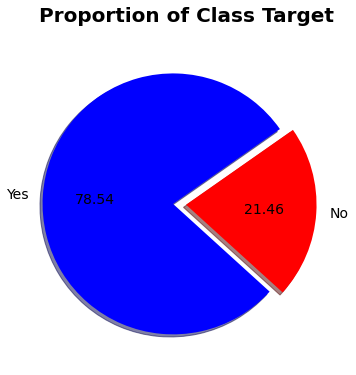

In [ ]:
# Distribution of training target
plt.figure(figsize=(6,6))
plt.pie(
        y_train.value_counts(),
        autopct='%.2f',
        explode=[0.1,0],
        labels=["Yes","No"],
        shadow=True,
        textprops={'fontsize': 14},
        colors=["blue","red"],
        startangle=35)

plt.title("Proportion of Class Target",fontsize=20, fontweight='bold', pad=20)
plt.show()

#**Exploratory Data Analysis**

Tools:
* Matplotlib
* Seaborn
* Tableau

In [ ]:
df_cred = pd.read_csv('/content/drive/MyDrive/VIX DS ID X Partners/df_cred.csv')
df_cred.head(2)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  installment grade sub_grade emp_title emp_length home_ownership  annual_inc verification_status     issue_d  loan_status pymnt_plan                                                url      purpose     title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_pull_year
0           0  1077501    1296599       5000         5000           4975.0  36 months     10.65       162.87     B        B2   Teacher  10+ years           RENT     24000.0            Verified  2011-12-01            1          n  https://www.lendingclub.com/browse/loanDetail....  credit_card  Computer    860xx         AZ  27.65          0.0       1985-01-01             1.0                     0.0       3.0      0.0      13648        83.7        9.0                   f        0.0            0.0  5861.071414          5831.78          5000.00         861.07                 0.0        0.00                     0.00   2015-01-01           171.62         2016-01-01                         0.0                          0.0            1       INDIVIDUAL             0.0           0.0      81539.0           22800.0          37                31
1           1  1077430    1314167       2500         2500           2500.0  60 months     15.27        59.83     C        C4     Ryder   < 1 year           RENT     30000.0     Source Verified  2011-12-01            0          n  https://www.lendingclub.com/browse/loanDetail....          car      bike    309xx         GA   1.00          0.0       1999-04-01             5.0                     0.0       3.0      0.0       1687         9.4        4.0                   f        0.0            0.0  1008.710000          1008.71           456.46         435.17                 0.0      117.08                     1.11   2013-04-01           119.66         2013-09-01                         0.0                          0.0            1       INDIVIDUAL             0.0           0.0      81539.0           22800.0          16                14

## What are the employee titles of our borrowers?



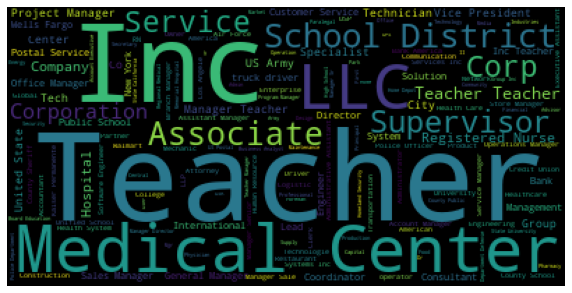

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(emp for emp in df_cred.emp_title))

plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Does the employment length have an impact to good or bad loan?

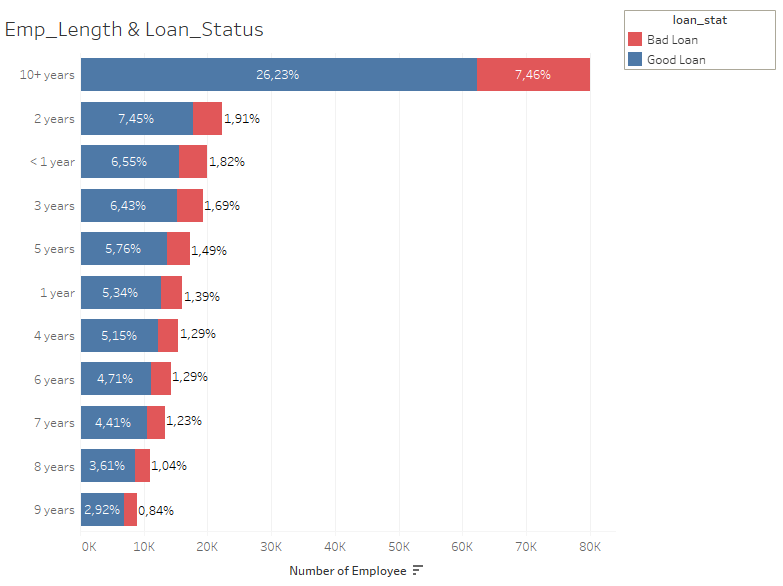

## Why do our borrower take credit loan?

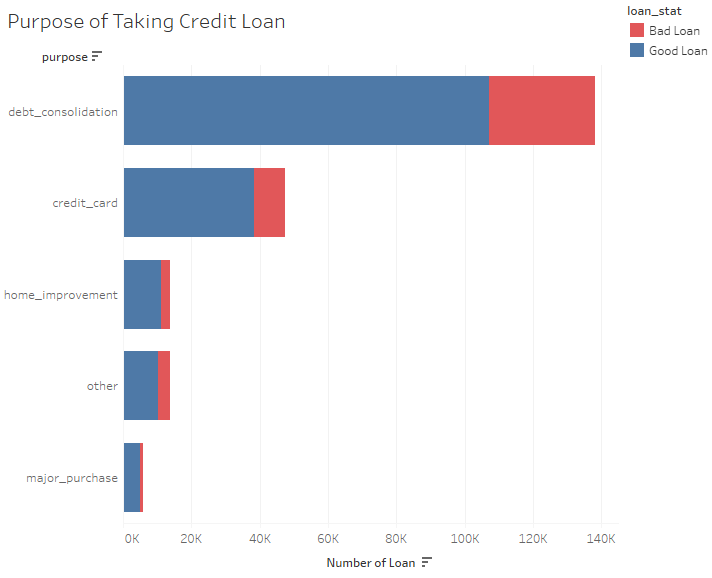

## What can be concluded from good or bad loans based on their number of payments on the loan (term)?

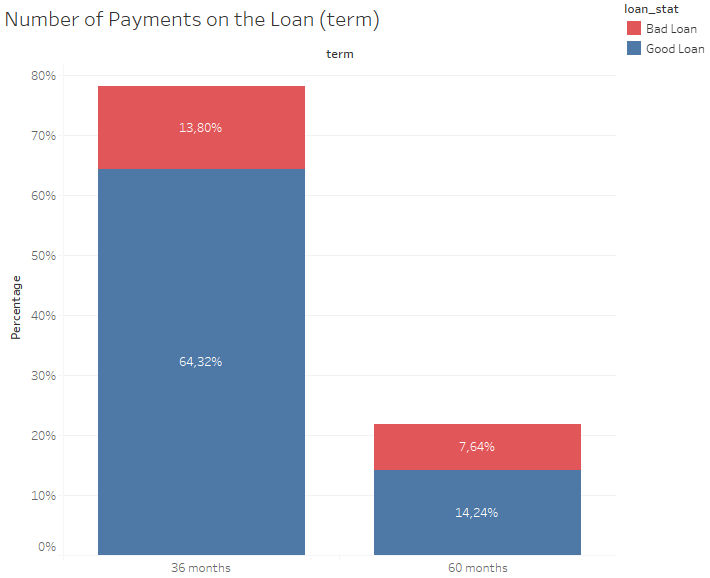

## How about classifying grade towards our borrower and the loan status?

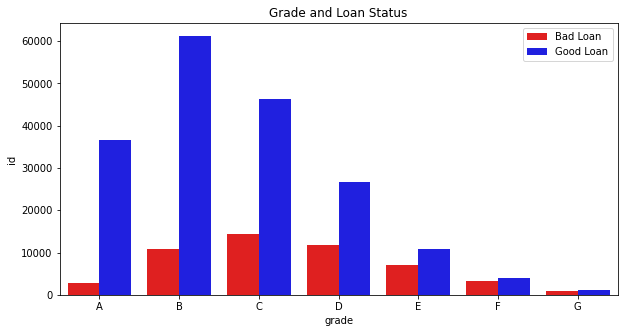

In [ ]:
plt.figure(figsize=(10,5))
grade_loan = df_cred.groupby(['grade', 'loan_status'])['id'].count().reset_index()
# plot with seaborn barplot
p = sns.barplot(data=grade_loan, x='grade', y='id', hue='loan_status',palette=['red','blue'])
plt.title("Grade and Loan Status")
legend_labels, _= p.get_legend_handles_labels()
p.legend(legend_labels,['Bad Loan', 'Good Loan'])
plt.show(p)

#**Modelling**

In [ ]:
df_train_feat = pd.read_csv('/content/drive/MyDrive/VIX DS ID X Partners/df_train_feat.csv')
df_train_feat.head(2)

term  int_rate  installment  grade  emp_length  annual_inc  pymnt_plan    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_util  total_rec_late_fee  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  mths_since_last_major_derog  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_pull_year  SubGrade_A  SubGrade_B  SubGrade_C  SubGrade_D  SubGrade_E  SubGrade_F  SubGrade_G  home_ownership_MORTGAGE  home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  verification_status_Not Verified  verification_status_Source Verified  verification_status_Verified  purpose_credit_card  purpose_debt_consolidation  purpose_major_purchase  purpose_other  purpose_private_use  purpose_small_business  initial_list_status_f  initial_list_status_w
0    36     10.65       162.87      5          10     24000.0           0  27.65          0.0             1.0                     0.0       3.0      0.0        83.7                 0.0                     0.00           171.62                         0.0                          0.0             0.0           0.0      81539.0           22800.0          37                31           0           2           0           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               0.0                                  0.0                           1.0                  1.0                         0.0                     0.0            0.0                  0.0                     0.0                    1.0                    0.0
1    60     15.27        59.83      4           0     30000.0           0   1.00          0.0             5.0                     0.0       3.0      0.0         9.4                 0.0                     1.11           119.66                         0.0                          0.0             0.0           0.0      81539.0           22800.0          16                14           0           0           4           0           0           0           0                      0.0                   0.0                 0.0                  1.0                               0.0                                  1.0                           0.0                  0.0                         0.0                     0.0            0.0                  1.0                     0.0                    1.0                    0.0

In [ ]:
df_train_target = pd.read_csv('/content/drive/MyDrive/VIX DS ID X Partners/df_train_target.csv')
df_train_target['loan_status']

0         1
1         0
2         1
3         1
4         1
         ..
230232    0
230233    0
230234    1
230235    0
230236    1
Name: loan_status, Length: 230237, dtype: int64

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_feat, df_train_target['loan_status'], test_size=0.3,
                                                    random_state=42, stratify=df_train_target)
print('Class from training data df_train',Counter(y_train))

print('Class from testing data df_test',Counter(y_test))

Class from training data df_train Counter({1: 126579, 0: 34586})
Class from testing data df_test Counter({1: 54249, 0: 14823})


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from imblearn.over_sampling import SMOTE

def log_transform(x):
  return np.log(x + 1)

# Pipeline to transform the numerical features
numerical = ['int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc',
             'revol_util','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','mths_since_last_major_derog','tot_coll_amt',
             'tot_cur_bal','total_rev_hi_lim','pymnt_time','credit_pull_year']
skewed = ['installment','annual_inc','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc',
          'revol_util','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','mths_since_last_major_derog','tot_coll_amt',
          'tot_cur_bal','total_rev_hi_lim','pymnt_time','credit_pull_year']
diff = list(set(numerical) - set(skewed))

smt = SMOTE(random_state=42)
ss = StandardScaler()
log_transformer = FunctionTransformer(log_transform) # remainder='passthrough'

numerical_transformer = Pipeline([('log', log_transformer),('ss', ss)])
ct = ColumnTransformer([('num_transformer', numerical_transformer, skewed), ('scaler', ss, diff)], remainder='passthrough')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [ ]:
def evaluate_ks_and_roc_auc(y_real, y_proba):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba[:, 1]

    # Recover each class
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]

    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'] , df['proba'])

    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    return ks.statistic, roc_auc

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Training is success!
ROC AUC: 0.9766
KS: 0.8903 (p-value: 0.000e+00)
Classification report Logistic Regression : 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87     14823
           1       0.98      0.94      0.96     54249

    accuracy                           0.94     69072
   macro avg       0.90      0.94      0.92     69072
weighted avg       0.95      0.94      0.94     69072



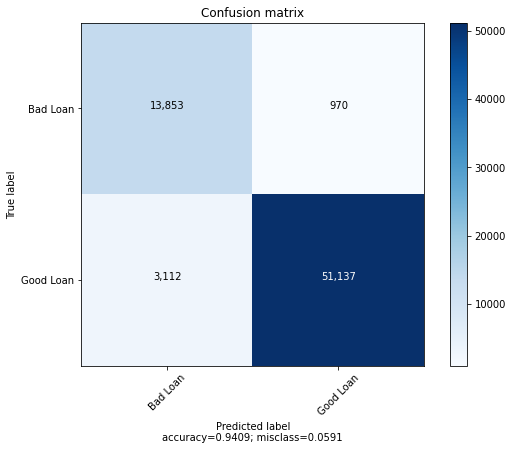

In [ ]:
# Main pipeline for fitting.
model_LR = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('RF', LogisticRegression(random_state=42) )
          ])
model_LR.fit(X_train, y_train)
print("Training is success!")
y_pred = model_LR.predict_proba(X_test)
predicted = model_LR.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report Logistic Regression : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

In [ ]:
len(model_LR.named_steps['RF'].coef_[0])

47

## Random Forest

Training is success!
ROC AUC: 0.9941
KS: 0.9440 (p-value: 0.000e+00)
Classification report Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     14823
           1       0.99      0.97      0.98     54249

    accuracy                           0.97     69072
   macro avg       0.95      0.97      0.96     69072
weighted avg       0.97      0.97      0.97     69072



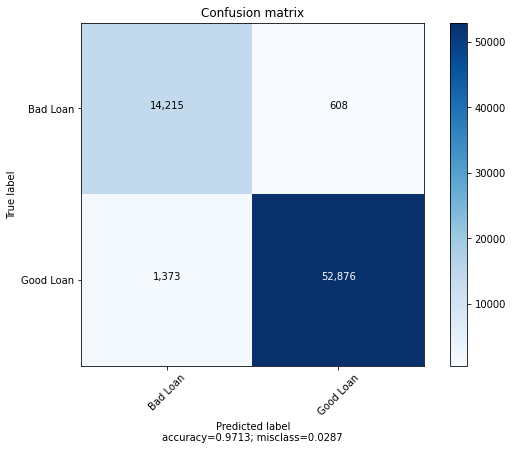

In [ ]:
# Main pipeline for fitting.
model_RF = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('RF', RandomForestClassifier(random_state=42) )
          ])
model_RF.fit(X_train, y_train)
print("Training is success!")
y_pred = model_RF.predict_proba(X_test)
predicted = model_RF.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report Random Forest Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

## Gradient Boosting Classifier

Training is success!
ROC AUC: 0.9948
KS: 0.9428 (p-value: 0.000e+00)
Classification report Gradient Boosting Classifier : 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93     14823
           1       0.99      0.97      0.98     54249

    accuracy                           0.97     69072
   macro avg       0.94      0.97      0.95     69072
weighted avg       0.97      0.97      0.97     69072



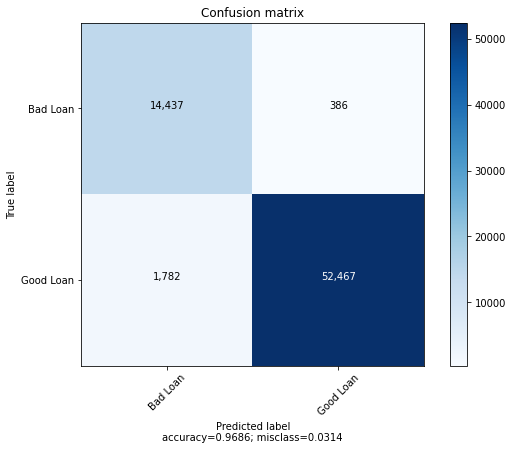

In [ ]:
# Main pipeline for fitting.
model_GB = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('GB', GradientBoostingClassifier(random_state=42) )
          ])
model_GB.fit(X_train, y_train)
print("Training is success!")
y_pred = model_GB.predict_proba(X_test)
predicted = model_GB.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report Gradient Boosting Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

## XGBoost Classifier

Training is success!
ROC AUC: 0.9943
KS: 0.9383 (p-value: 0.000e+00)
Classification report XGBoost Classifier : 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     14823
           1       0.99      0.96      0.98     54249

    accuracy                           0.97     69072
   macro avg       0.94      0.97      0.95     69072
weighted avg       0.97      0.97      0.97     69072



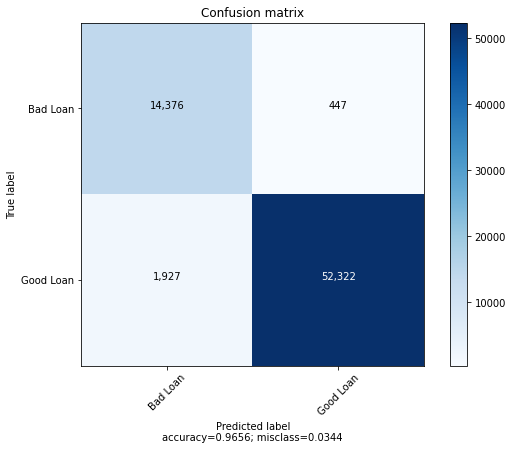

In [ ]:
# Main pipeline for fitting.
model_XGB = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('XGB', xgb.XGBClassifier(objective="binary:logistic",random_state=42) )
          ])
model_XGB.fit(X_train, y_train)
print("Training is success!")
y_pred = model_XGB.predict_proba(X_test)
predicted = model_XGB.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report XGBoost Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

## Voting Classifier

Training is success!
ROC AUC: 0.9948
KS: 0.9434 (p-value: 0.000e+00)
Classification report Voting Classifier : 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93     14823
           1       0.99      0.97      0.98     54249

    accuracy                           0.97     69072
   macro avg       0.94      0.97      0.96     69072
weighted avg       0.97      0.97      0.97     69072



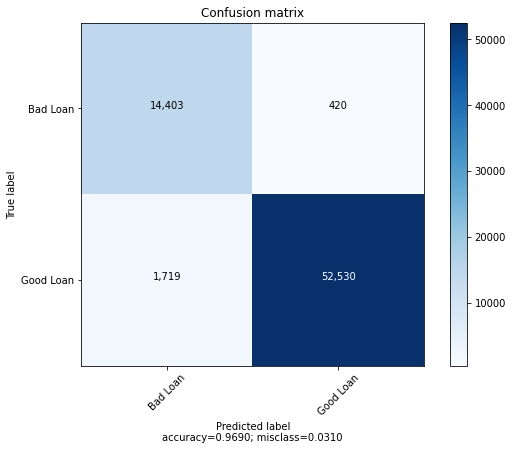

In [ ]:
from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier(random_state=42)
clf2 = GradientBoostingClassifier(random_state=42)
clf3 = xgb.XGBClassifier(objective="binary:logistic",random_state=42)

# Main pipeline for fitting.
model_VC = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('VC', VotingClassifier(estimators=[('RF', clf1), ('GB', clf2), ('XGB', clf3)],
                        voting='soft', weights=[1,2,1]) )
          ])
model_VC.fit(X_train, y_train)
print("Training is success!")
y_pred = model_VC.predict_proba(X_test)
predicted = model_VC.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report Voting Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

#**Model Optimization & Evaluation**

Chosen model: Gradient Boosting Classifier

## Hyperparameter Tuning

Training is success!
ROC AUC: 0.9968
KS: 0.9576 (p-value: 0.000e+00)
Classification report tuned Gradient Boosting Classifier : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     14823
           1       0.99      0.98      0.99     54249

    accuracy                           0.98     69072
   macro avg       0.96      0.98      0.97     69072
weighted avg       0.98      0.98      0.98     69072



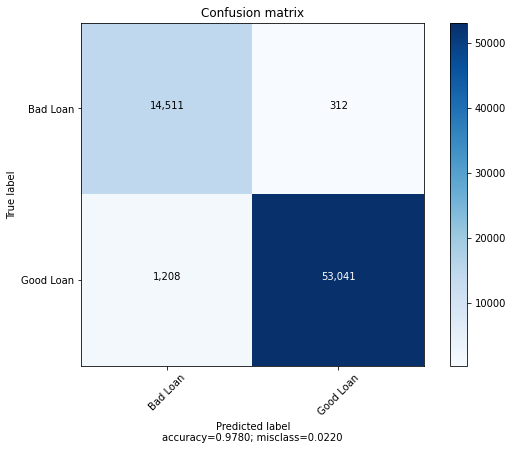

In [ ]:
# Gradient Boosting
# n_jobs=-1 to allow run it on all cores
params = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.05,0.01,0,0.1]
}
# Main pipeline for fitting.
model_GB_HT = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('RF_HT', RandomizedSearchCV(GradientBoostingClassifier(random_state=42), params, n_jobs=-1,
                                                cv=KFold(n_splits=3), scoring='roc_auc', refit=True) )
          ])
model_GB_HT.fit(X_train, y_train)
print("Training is success!")
y_pred = model_GB_HT.predict_proba(X_test)
predicted = model_GB_HT.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report tuned Gradient Boosting Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

In [ ]:
model_GB_HT.steps[2][1].best_params_

{'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 500}

Training is success!
ROC AUC: 0.9968
KS: 0.9576 (p-value: 0.000e+00)
Classification report Gradient Boosting Classifier : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     14823
           1       0.99      0.98      0.99     54249

    accuracy                           0.98     69072
   macro avg       0.96      0.98      0.97     69072
weighted avg       0.98      0.98      0.98     69072



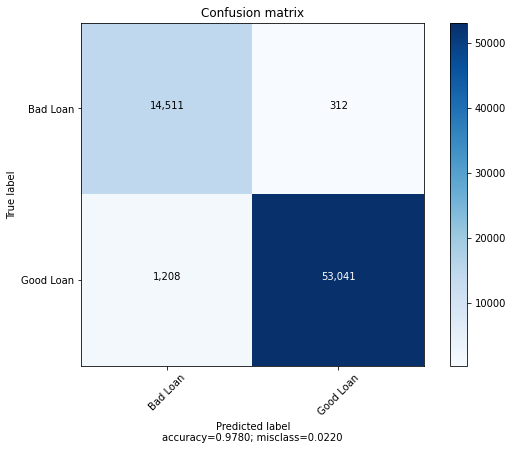

In [ ]:
# Main pipeline for fitting.
model_GB = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('GB', GradientBoostingClassifier(random_state=42,learning_rate=0.01,
                                                     max_depth=9,n_estimators=500) )
          ])
model_GB.fit(X_train, y_train)
print("Training is success!")
y_pred = model_GB.predict_proba(X_test)
predicted = model_GB.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report Gradient Boosting Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

## Model Checking

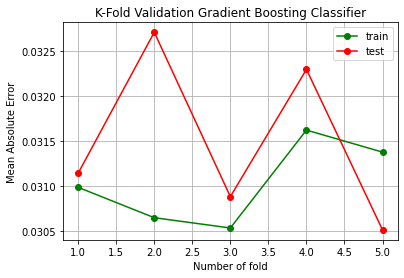

In [ ]:
scores_train = []
scores_test = []

lr = model_GB

kf = KFold(shuffle=True,random_state=42, n_splits=5) #random_state equals to previous train_test_split
# shuffle=True

for train_index, test_index in kf.split(df_train_feat):
  X_train = df_train_feat.take(list(train_index),axis=0)
  X_test = df_train_feat.take(list(test_index),axis=0)
  y_train, y_test = df_train_target.take(list(train_index),axis=0), df_train_target.take(list(test_index),axis=0)
  # Train the training data
  lr.fit(X_train, y_train)
  # Predict training and testing
  y_train_pred = lr.predict(X_train)
  y_pred = lr.predict(X_test)
  # Evaluating training and testing
  score_train = mean_absolute_error(y_train, y_train_pred)
  score_test = mean_absolute_error(y_test, y_pred)
  scores_train.append(score_train)
  scores_test.append(score_test)

folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, scores_train, 'o-', color='green', label='train')
plt.plot(folds, scores_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.title('K-Fold Validation Gradient Boosting Classifier')
plt.show()

#**Model Interpretation**

Top 10 Feature Importances in the Model

In [ ]:
def compute_feature_importance(voting_clf, weights):
    """ Function to compute feature importance of Voting Classifier """

    feature_importance = dict()
    for est in voting_clf.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    fe_scores = [0]*len(list(feature_importance.values())[0])
    for idx, imp_score in enumerate(feature_importance.values()):
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores

In [ ]:
feature_importance = pd.DataFrame()
feature_importance['features'] = X_train.columns
feature_importance['importance'] = model_GB.named_steps['GB'].feature_importances_

<Figure size 2160x720 with 0 Axes>

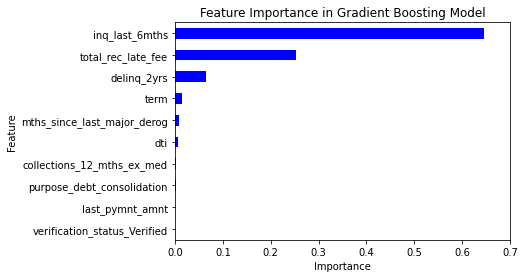

In [ ]:
plt.figure(figsize=(30,10))
plot = feature_importance.sort_values('importance', ascending = False).head(10).plot.barh(color='blue',legend=None)
plot.set_yticklabels(feature_importance.sort_values('importance', ascending = False).head(10).features)
plt.title('Feature Importance in Gradient Boosting Model')
plt.xlim([0,0.7])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

Top 3 feature importances in predicting credit risk is good or bad:
* `inq_last_6mths`: Number of credit inquiries in past 12 months
* `total_rec_late_fee`: Late fees received to date
* `delinq_2yrs`: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years